In [1]:
import logging
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pyobsbox import Checker

In [3]:
logging.getLogger("pyobsbox").setLevel(logging.WARNING)
logging.getLogger("pyobsbox.plotter").setLevel(logging.DEBUG)

# List models

In [4]:
models_folder = Path("../../models")

In [5]:
[model.name for model in list(models_folder.glob('model_*'))]

['model_conv_64_32_16_8_stride_4_B1H_Inst_znorm_abs_diff_seed_42',
 'model_dense_512_128_32_8_B1H_Inst_center_scale_100_seed_42',
 'model_conv_64_32_16_8_stride_4_B1H_Inst_znorm_seed_42',
 'model_time_dist_32_16_B1H_Inst_500',
 'model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_stride_4_B1H_Inst',
 'model_conv_32_16_stride_4_B1H_Inst_jorg',
 'model_conv_max_pool_64_32_16_8_stride_4_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_center_scale_1000_seed_42',
 'model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_min_max_rolling_avg_std_window_2049_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_10000_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_1000_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_znorm_seed_42',
 'model_conv_32

In [6]:
model_path = models_folder / "model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_min_max_rolling_avg_std_window_2049_seed_42"

In [7]:
checker = Checker(model_path)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 512, 64)           960       
_________________________________________________________________
dropout (Dropout)            (None, 512, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 128, 32)           14368     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 32, 16)            3600      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 16)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 8, 8)              9

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

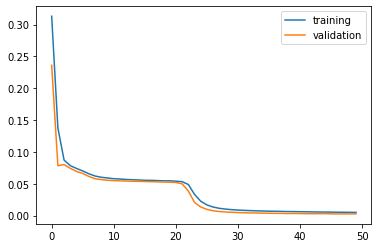

In [8]:
checker.plot_loss()

In [9]:
train_data, train_meta = checker.load_train_dataset()
train_prediction = checker.predict(train_data)

bunch_sorted_index: [1 2 0]
group_bunches: [3139. 1795. 2248.]
group_bunches sorted: [1795. 2248. 3139.]
restore_index: [2 0 1]
group_bunches restored: [3139. 1795. 2248.]
bunch_sorted_index: [0 2 1]
group_bunches: [1014. 2447. 1871.]
group_bunches sorted: [1014. 1871. 2447.]
restore_index: [0 2 1]
group_bunches restored: [1014. 2447. 1871.]

50/50 [==============================] - 60s 1s/step


In [10]:
train_meta.head()

type  fill  beam plane  q           date_time  \
6264  Inst  6706     1     h  7 2018-05-20 12:19:14   
6094  Inst  7466     1     h  7 2018-11-23 02:27:15   
368   Inst  6762     1     h  7 2018-06-06 19:53:15   
288   Inst  7242     1     h  7 2018-10-01 08:29:59   
3237  Inst  7448     1     h  7 2018-11-16 09:22:15   

                                                   file  n_bunches  \
6264  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6706/...        987   
6094  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7466/...        670   
368   /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6762/...       2556   
288   /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7242/...        924   
3237  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7448/...        648   

      bunch_index  bunch_number  ts_length  chunk  
6264        196.0          32.0      65536     24  
6094        824.0         171.0      65536     23  
368        1016.0         726.0      65536      1  
288         252.0         158.0      65536      1  
3237        741.0         138.0      65536     12

In [11]:
train_meta.shape

(396800, 12)

In [12]:
train_data.shape

(396800, 2048, 2)

In [13]:
train_prediction.shape

(396800, 2048, 2)

In [14]:
validation_data, validation_meta = checker.load_validation_dataset()
validation_prediction = checker.predict(validation_data)

bunch_sorted_index: [0 2 1]
group_bunches: [1130. 3081. 2585.]
group_bunches sorted: [1130. 2585. 3081.]
restore_index: [0 2 1]
group_bunches restored: [1130. 3081. 2585.]

5/5 [==============================] - 5s 994ms/step


In [15]:
validation_meta.head()

type  fill  beam plane  q           date_time  \
4808  Inst  6186     1     h  7 2017-09-10 08:05:53   
1244  Inst  6773     1     h  7 2018-06-10 07:20:55   
5767  Inst  7137     1     h  7 2018-09-08 04:51:14   
7206  Inst  7349     1     h  7 2018-10-25 14:36:01   
7624  Inst  6186     1     h  7 2017-09-10 08:05:53   

                                                   file  n_bunches  \
4808  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6186/...        460   
1244  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6773/...        636   
5767  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7137/...       2556   
7206  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7349/...        192   
7624  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6186/...        460   

      bunch_index  bunch_number  ts_length  chunk  
4808        214.0         105.0      65536     18  
1244        117.0          61.0      65536      4  
5767       1227.0         904.0      65536     22  
7206        143.0          59.0      65536     28  
7624        214.0         105.0      65536     29

In [16]:
validation_meta.shape

(39680, 12)

In [17]:
validation_data.shape

(39680, 2048, 2)

In [18]:
validation_prediction.shape

(39680, 2048, 2)

In [19]:
def plot_train_index(index: int):
    """Helper function to plot a sample from the train dataset.
    """
    true_signal = train_data[index]
    predicted_signal = train_prediction[index]
    metadata_row = train_meta.iloc[index]
    print(f"index: {index}")
    print(f"Error: {train_error[index]}")
    print(metadata_row)
    checker.plot_sample(metadata_row, true_signal, predicted_signal)
    plt.show()
    encoded = checker.encode(true_signal)
    plt.imshow(encoded)
    plt.show()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

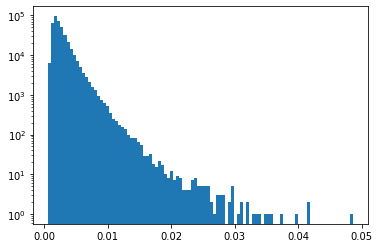

In [20]:
train_error = checker.MSE(train_data, train_prediction)
checker.plot_error(train_error, bins=100)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

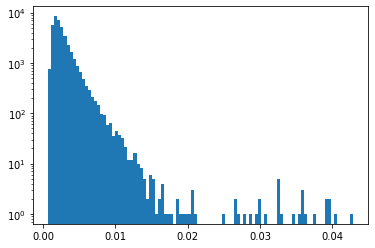

In [21]:
validation_error = checker.MSE(validation_data, validation_prediction)
checker.plot_error(validation_error, bins=100)

In [22]:
# Histogram peak
hist, bins = np.histogram(train_error, bins=100)
hist_peak = bins[np.argmax(hist)]

index: 0
Error: 0.0014336667759927842
type                                                         Inst
fill                                                         6706
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-20 12:19:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6706/...
n_bunches                                                     987
bunch_index                                                   196
bunch_number                                                   32
ts_length                                                   65536
chunk                                                          24
Name: 6264, dtype: object


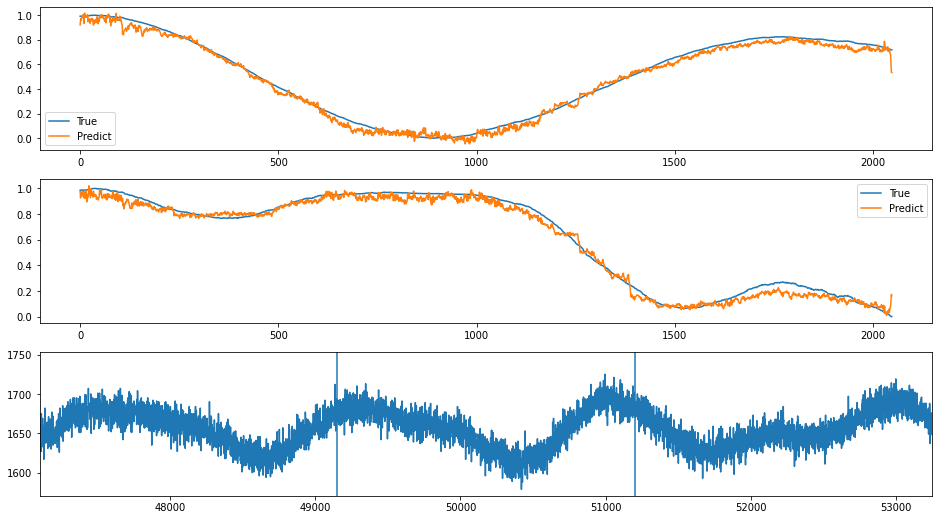

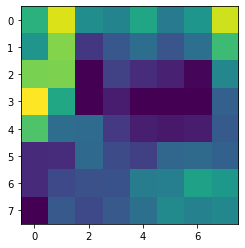

In [23]:
# plotting a random sample
plot_train_index(0)

In [24]:
sorted_error_indices = np.argsort(train_error)

# From left to right

index: 106706
Error: 0.0006252420510791817
type                                                         Inst
fill                                                         7384
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-29 02:46:03
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7384/...
n_bunches                                                     252
bunch_index                                                   142
bunch_number                                                   86
ts_length                                                   65536
chunk                                                           4
Name: 1199, dtype: object


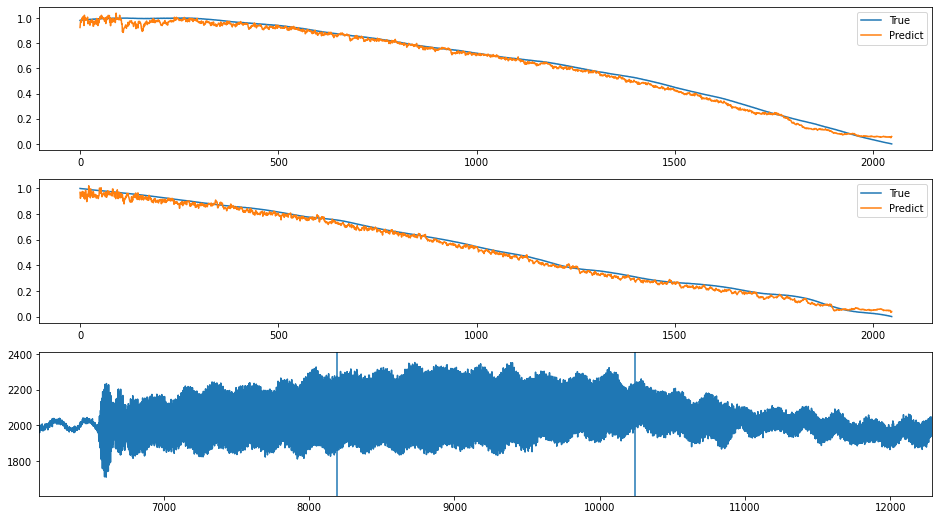

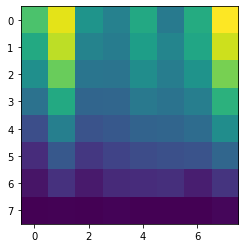

index: 288931
Error: 0.0006363587561962941
type                                                         Inst
fill                                                         6596
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-23 09:04:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6596/...
n_bunches                                                     228
bunch_index                                                     3
bunch_number                                                    3
ts_length                                                   65536
chunk                                                          22
Name: 5821, dtype: object


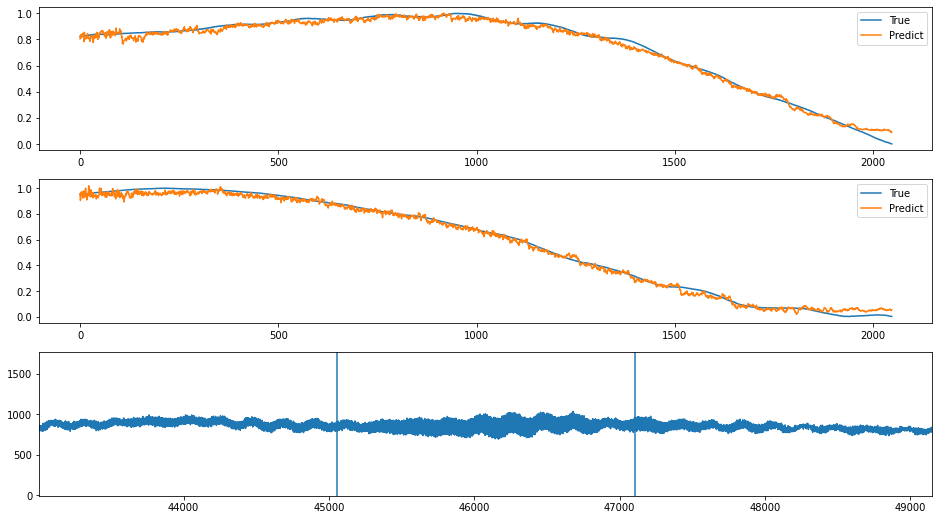

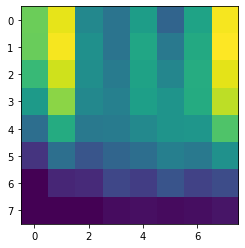

index: 18665
Error: 0.0006432524607842914
type                                                         Inst
fill                                                         7346
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-25 09:43:34
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7346/...
n_bunches                                                    2556
bunch_index                                                  2824
bunch_number                                                 2102
ts_length                                                   65536
chunk                                                          14
Name: 3794, dtype: object


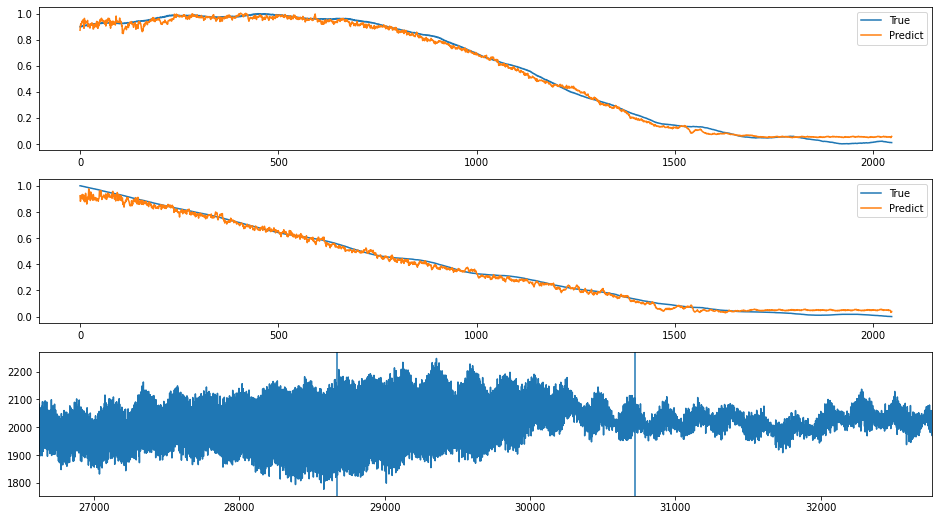

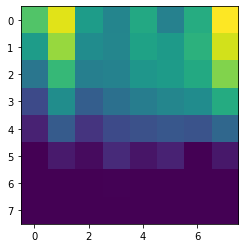

index: 108881
Error: 0.000656475239227119
type                                                         Inst
fill                                                         7483
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-29 00:53:51
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7483/...
n_bunches                                                       4
bunch_index                                                     8
bunch_number                                                    2
ts_length                                                   65536
chunk                                                          14
Name: 3703, dtype: object


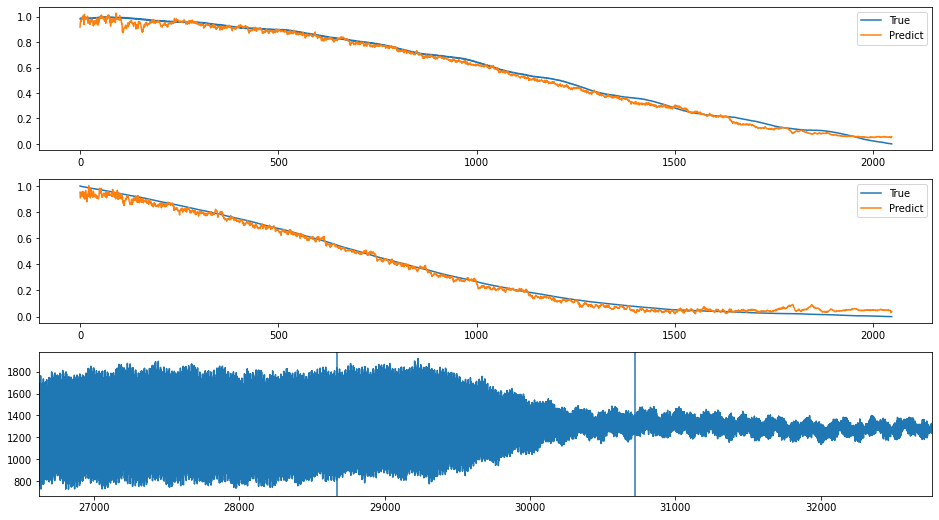

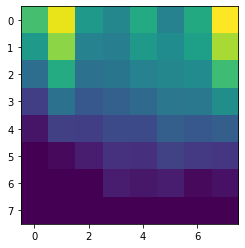

index: 47384
Error: 0.0006750331299845016
type                                                         Inst
fill                                                         6597
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-23 10:17:26
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6597/...
n_bunches                                                     228
bunch_index                                                   183
bunch_number                                                  139
ts_length                                                   65536
chunk                                                          13
Name: 3368, dtype: object


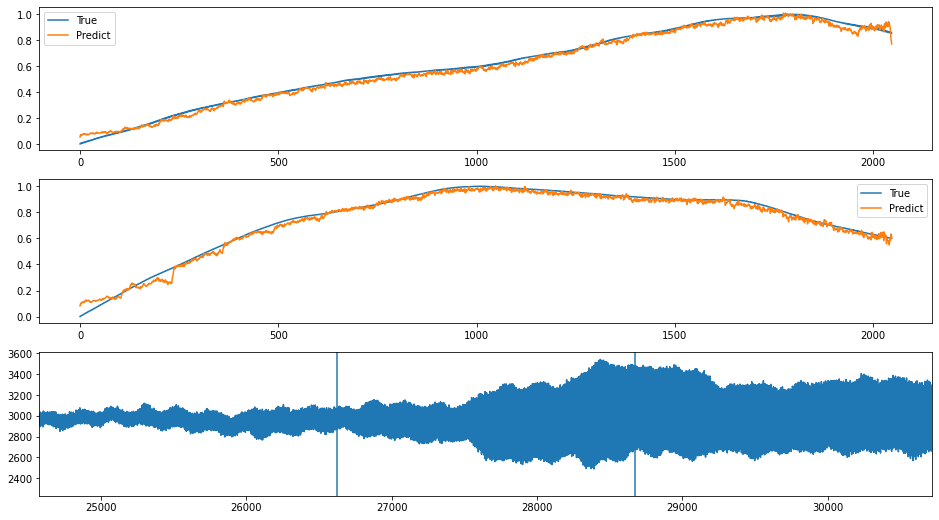

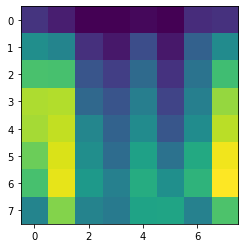

index: 307862
Error: 0.0006798548467714493
type                                                         Inst
fill                                                         7087
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-25 12:58:20
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7087/...
n_bunches                                                     252
bunch_index                                                    90
bunch_number                                                   41
ts_length                                                   65536
chunk                                                          12
Name: 3290, dtype: object


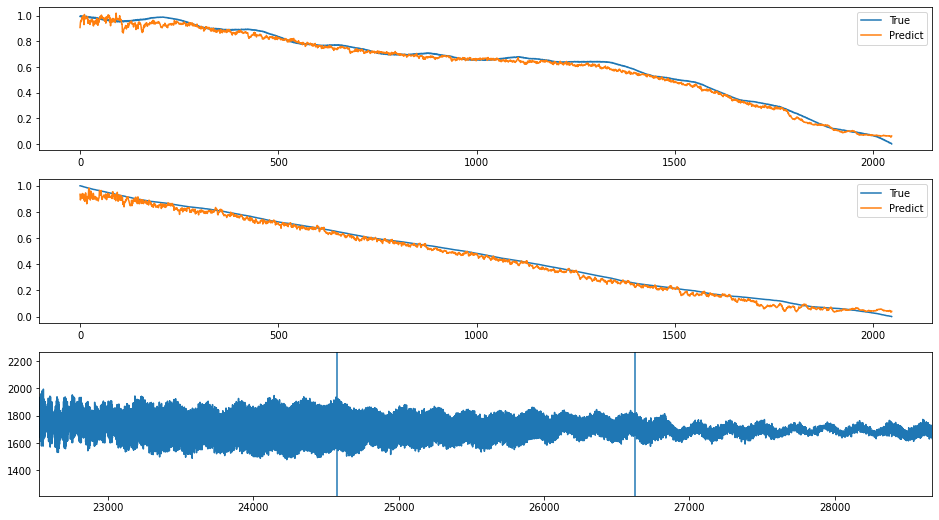

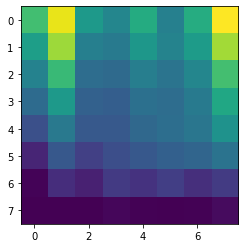

index: 304978
Error: 0.000682865645902646
type                                                         Inst
fill                                                         7087
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-25 12:58:20
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7087/...
n_bunches                                                     252
bunch_index                                                    90
bunch_number                                                   41
ts_length                                                   65536
chunk                                                           5
Name: 1498, dtype: object


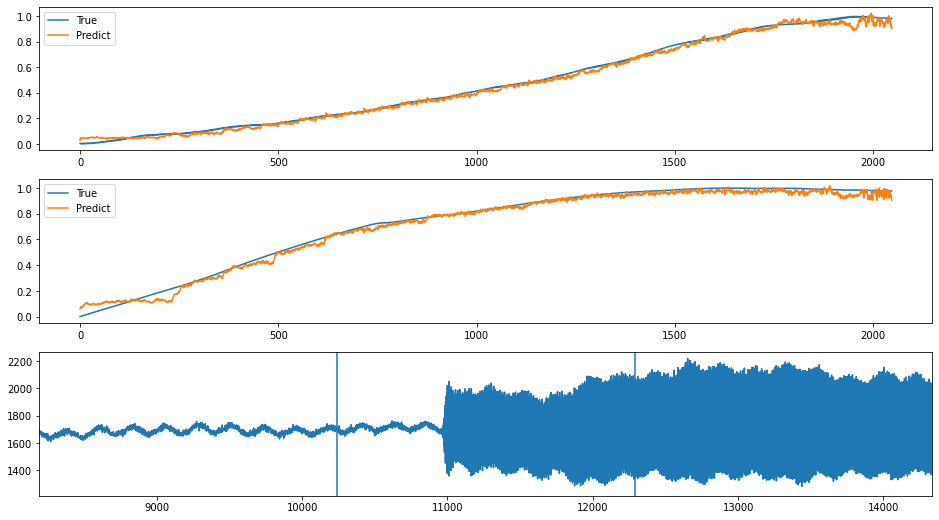

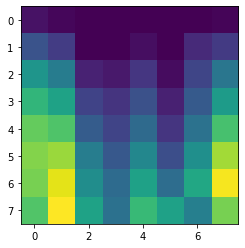

index: 196568
Error: 0.0006913813521639857
type                                                         Inst
fill                                                         6193
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-12 23:17:24
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6193/...
n_bunches                                                     460
bunch_index                                                   326
bunch_number                                                  178
ts_length                                                   65536
chunk                                                           7
Name: 1922, dtype: object


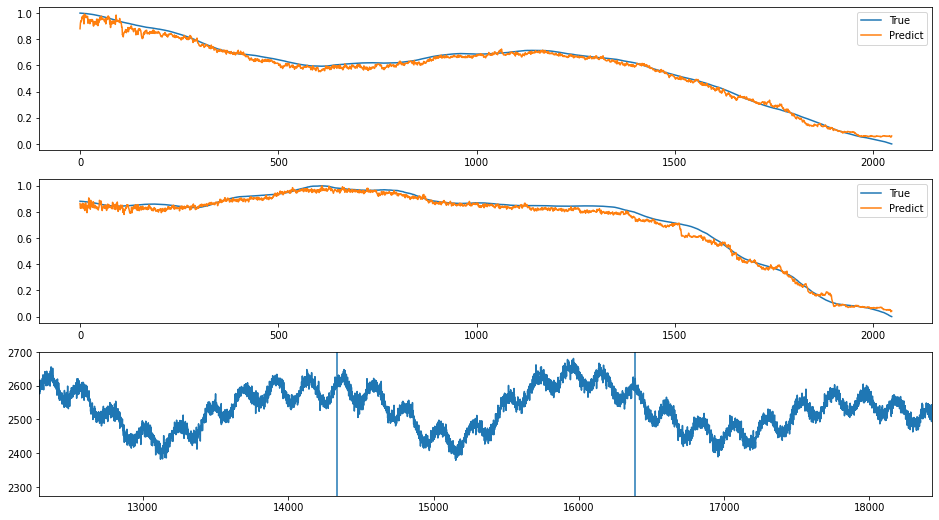

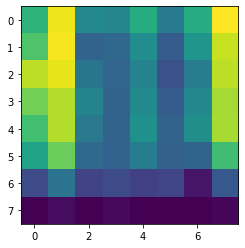

index: 194886
Error: 0.0006968172470978162
type                                                         Inst
fill                                                         6712
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-22 17:38:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6712/...
n_bunches                                                    1212
bunch_index                                                   852
bunch_number                                                  600
ts_length                                                   65536
chunk                                                          13
Name: 3523, dtype: object


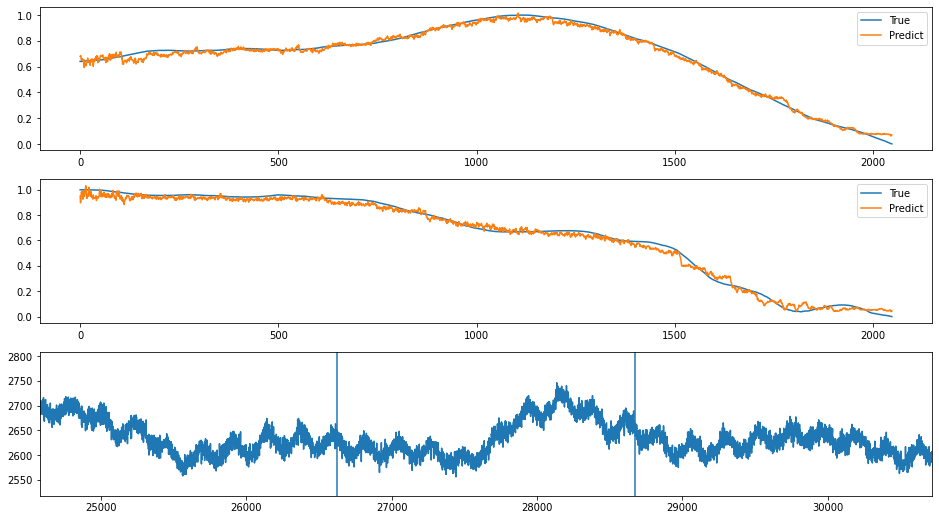

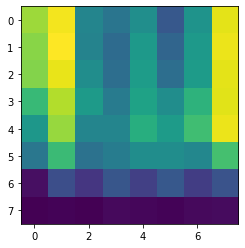

index: 355878
Error: 0.0006969372005720945
type                                                         Inst
fill                                                         6712
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-22 17:38:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6712/...
n_bunches                                                    1212
bunch_index                                                    87
bunch_number                                                   19
ts_length                                                   65536
chunk                                                          13
Name: 3419, dtype: object


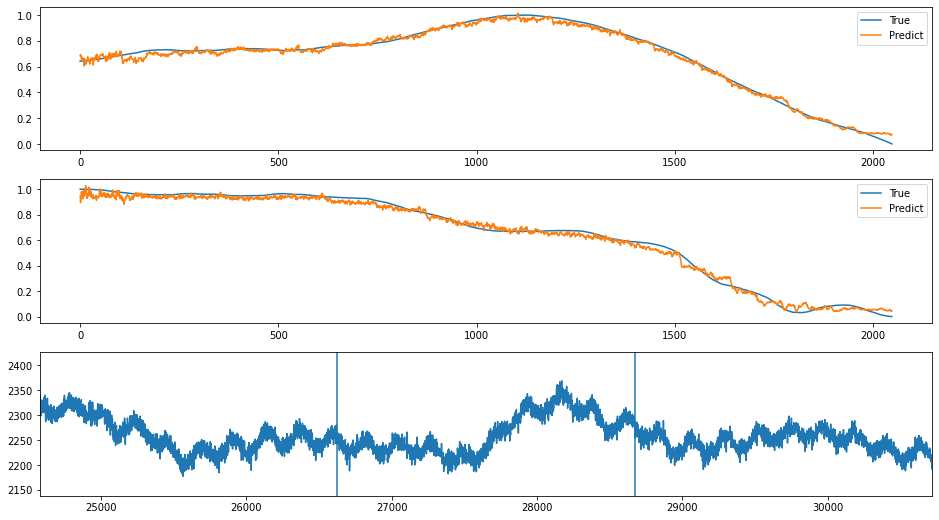

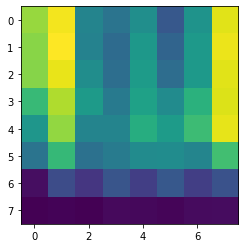

In [25]:
for i in range(10):
    index = sorted_error_indices[i]
    plot_train_index(index)

# From right to left

index: 32700
Error: 0.048566413181978185
type                                                         Inst
fill                                                         6988
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-27 05:43:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6988/...
n_bunches                                                     444
bunch_index                                                   599
bunch_number                                                  326
ts_length                                                   65536
chunk                                                          19
Name: 4918, dtype: object


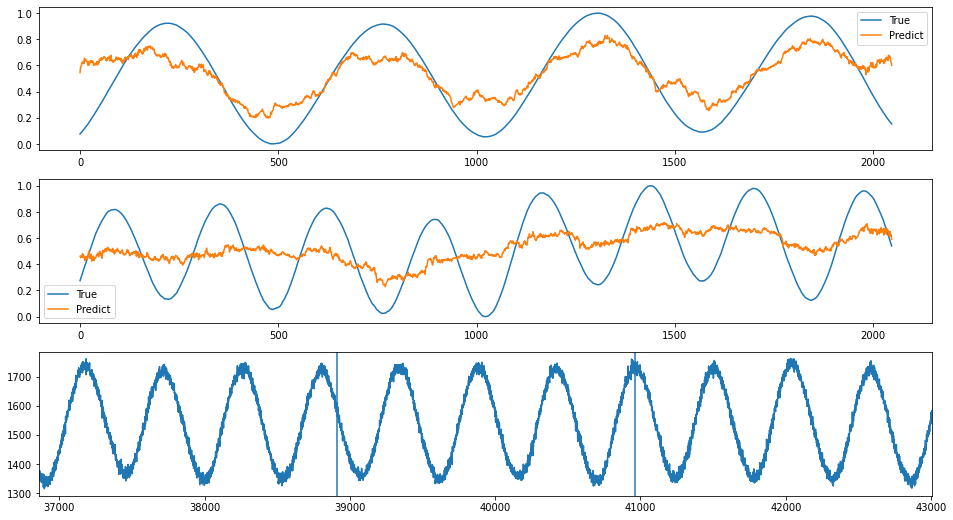

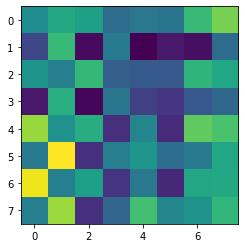

index: 241630
Error: 0.04154942274980558
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:46:49
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2538
bunch_number                                                  123
ts_length                                                   65536
chunk                                                           6
Name: 1738, dtype: object


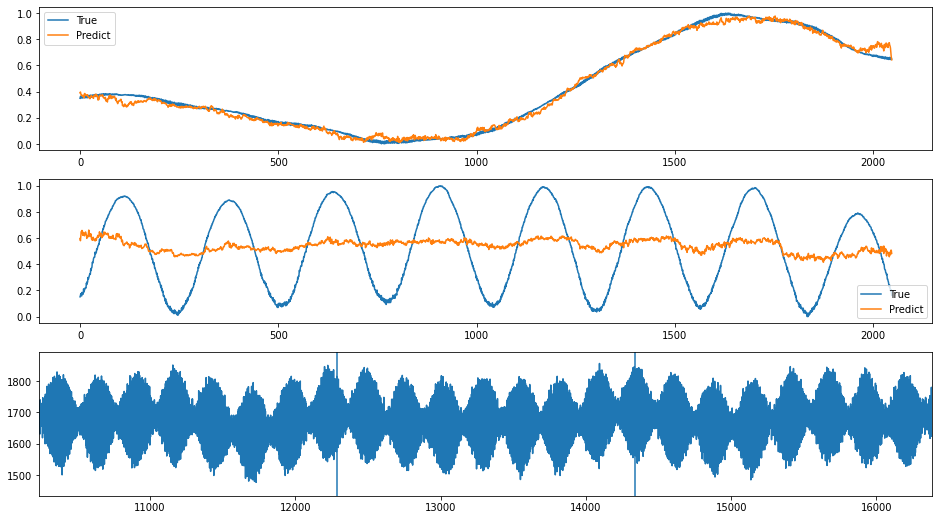

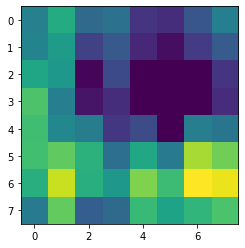

index: 243580
Error: 0.04151324470998574
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:46:49
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2538
bunch_number                                                  123
ts_length                                                   65536
chunk                                                           0
Name: 202, dtype: object


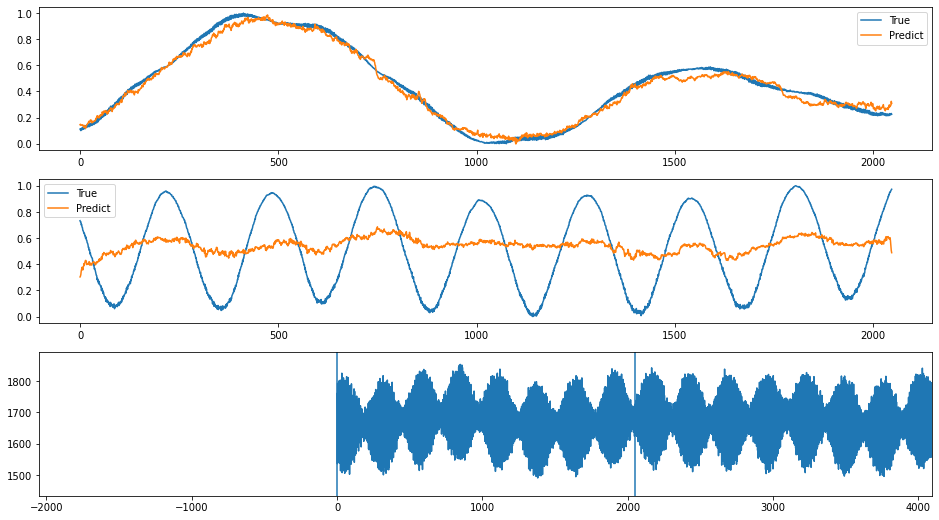

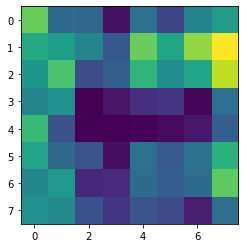

index: 108096
Error: 0.039877362680033696
type                                                         Inst
fill                                                         6797
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-15 00:45:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6797/...
n_bunches                                                     156
bunch_index                                                   377
bunch_number                                                  121
ts_length                                                   65536
chunk                                                           8
Name: 2204, dtype: object


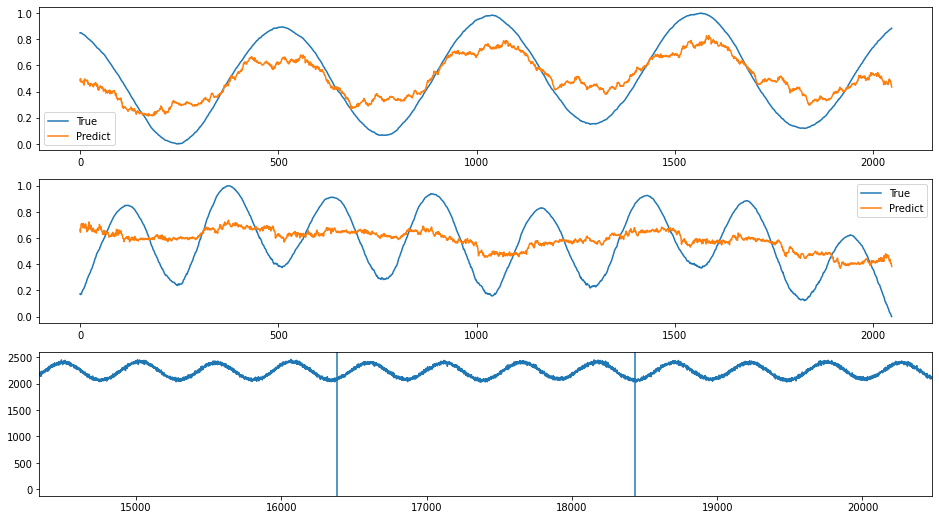

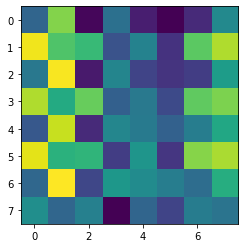

index: 171175
Error: 0.037383571313796715
type                                                         Inst
fill                                                         6988
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-27 05:19:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6988/...
n_bunches                                                     444
bunch_index                                                   502
bunch_number                                                  260
ts_length                                                   65536
chunk                                                          24
Name: 6157, dtype: object


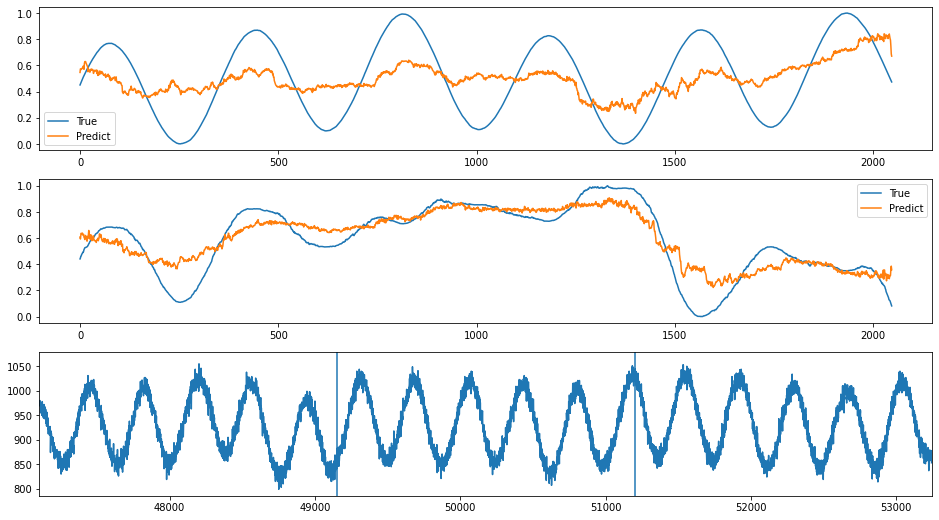

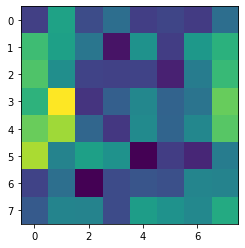

index: 242507
Error: 0.035923196361268186
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:46:49
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2538
bunch_number                                                  123
ts_length                                                   65536
chunk                                                          27
Name: 7114, dtype: object


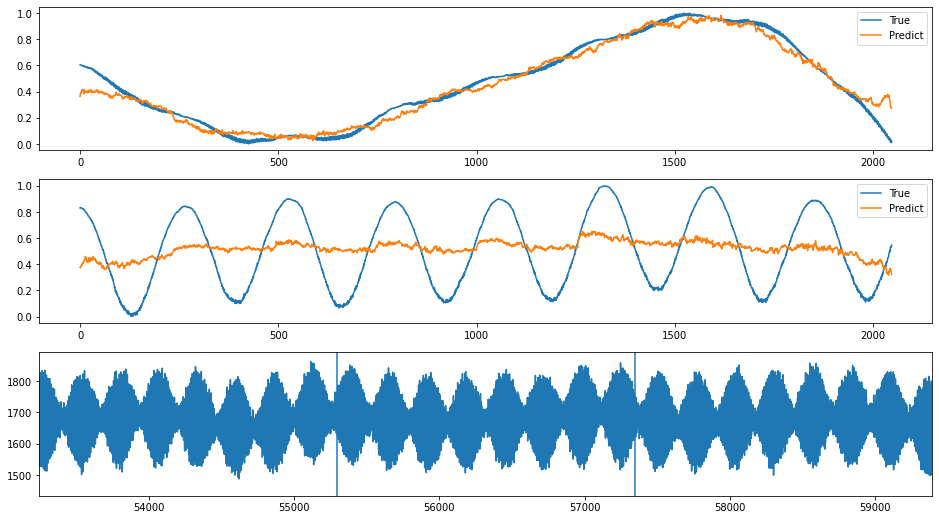

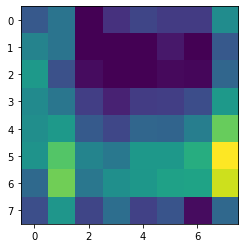

index: 244479
Error: 0.03545587962508643
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:46:49
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2538
bunch_number                                                  123
ts_length                                                   65536
chunk                                                          28
Name: 7370, dtype: object


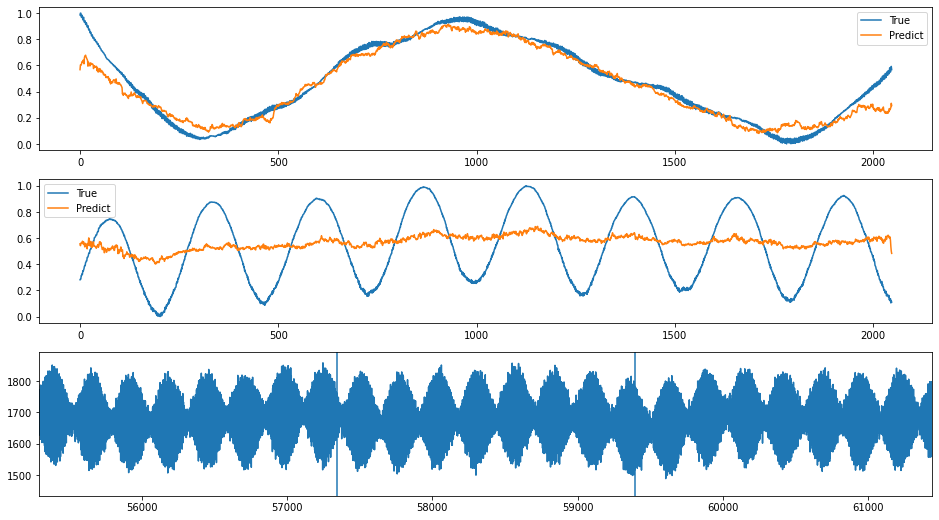

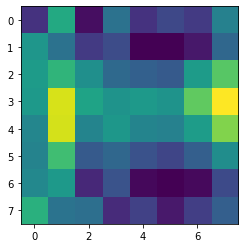

index: 242468
Error: 0.03509967947063347
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:46:49
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2538
bunch_number                                                  123
ts_length                                                   65536
chunk                                                           2
Name: 714, dtype: object


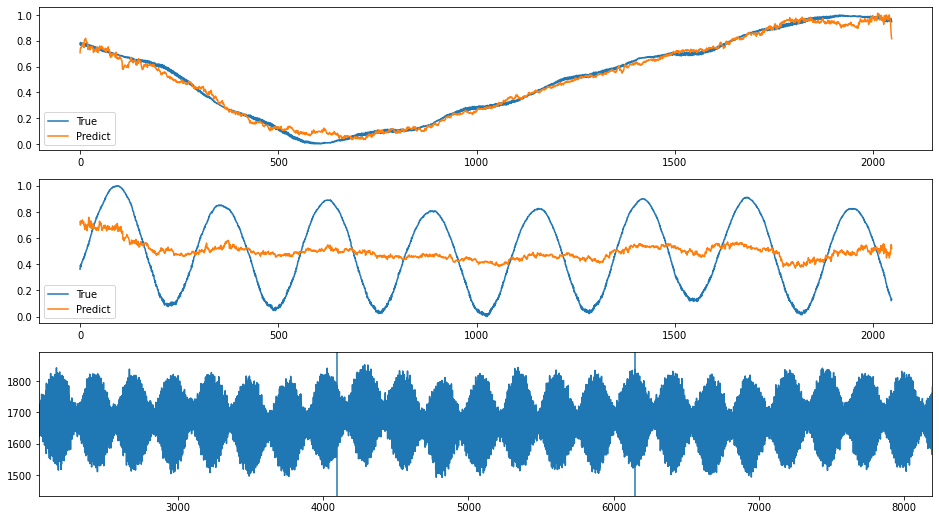

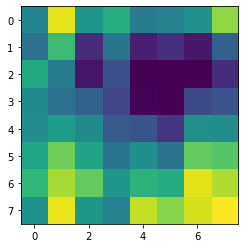

index: 240701
Error: 0.033741963248559534
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:46:49
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2538
bunch_number                                                  123
ts_length                                                   65536
chunk                                                          16
Name: 4298, dtype: object


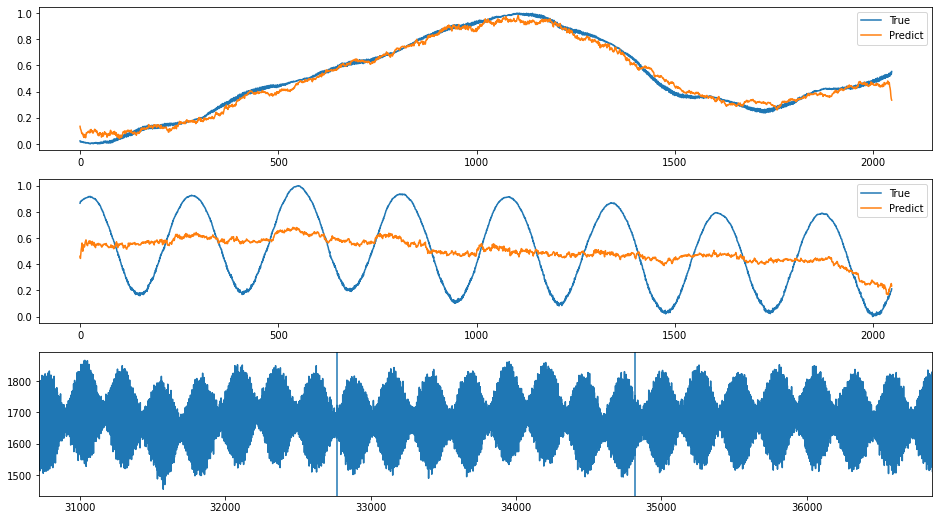

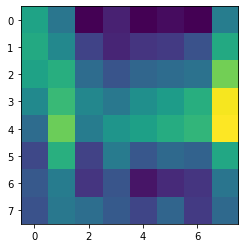

index: 108707
Error: 0.0335285216285157
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 23:00:38
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                    70
bunch_number                                                   11
ts_length                                                   65536
chunk                                                          17
Name: 4384, dtype: object


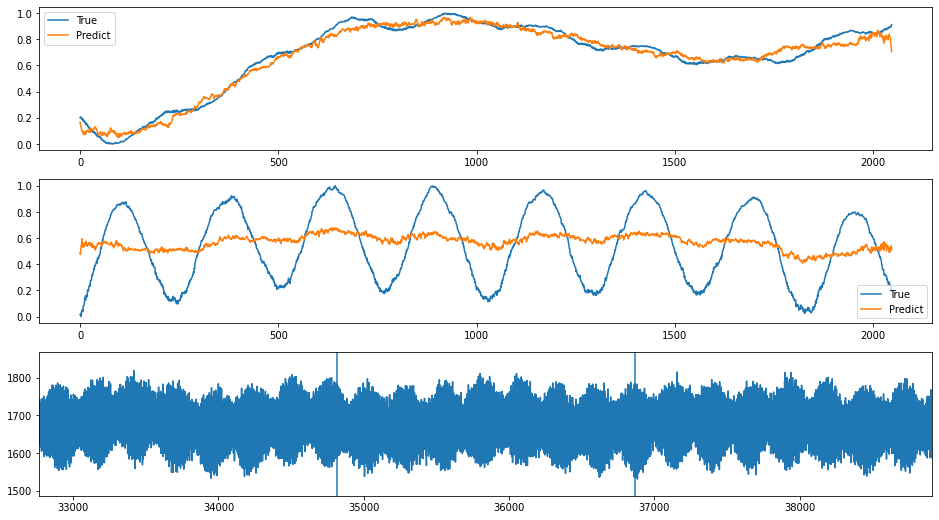

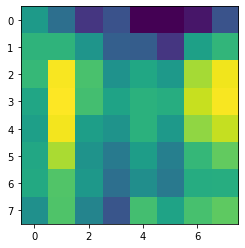

index: 244392
Error: 0.032934668466934436
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:46:49
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2538
bunch_number                                                  123
ts_length                                                   65536
chunk                                                          17
Name: 4554, dtype: object


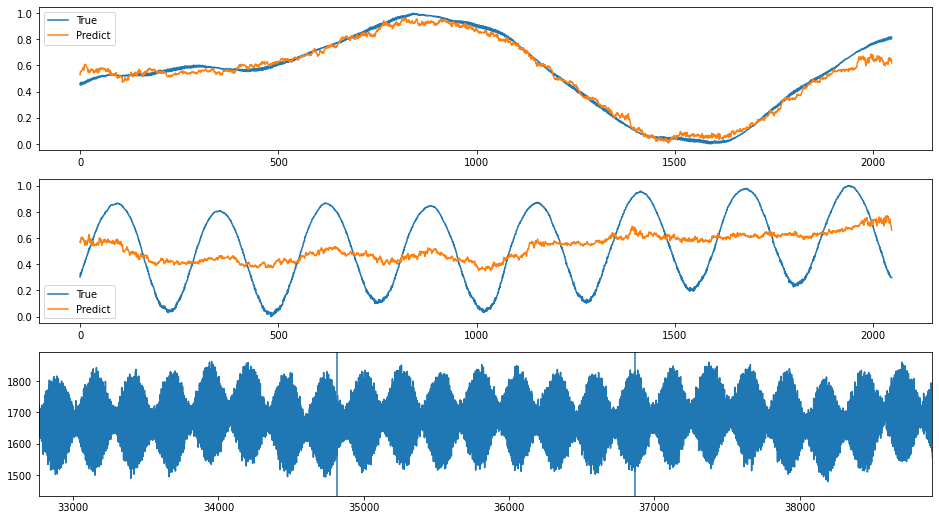

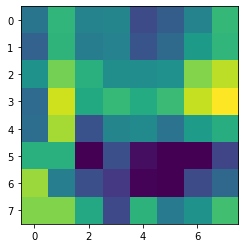

index: 240640
Error: 0.03221640563967393
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:46:49
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2538
bunch_number                                                  123
ts_length                                                   65536
chunk                                                           3
Name: 970, dtype: object


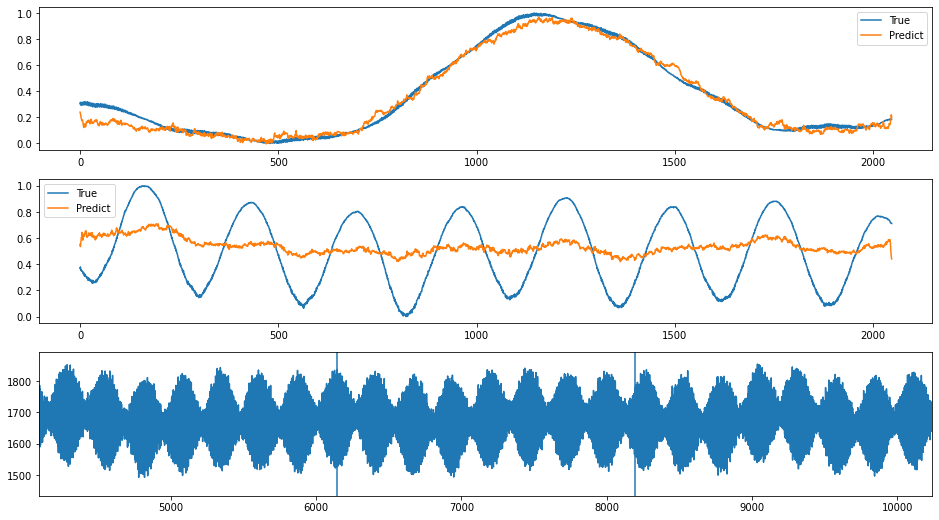

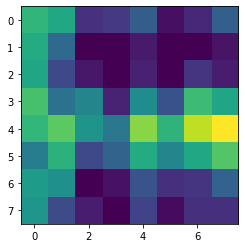

index: 110982
Error: 0.03194385849503288
type                                                         Inst
fill                                                         6266
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-02 19:29:50
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6266/...
n_bunches                                                    1836
bunch_index                                                   523
bunch_number                                                  273
ts_length                                                   65536
chunk                                                          23
Name: 6106, dtype: object


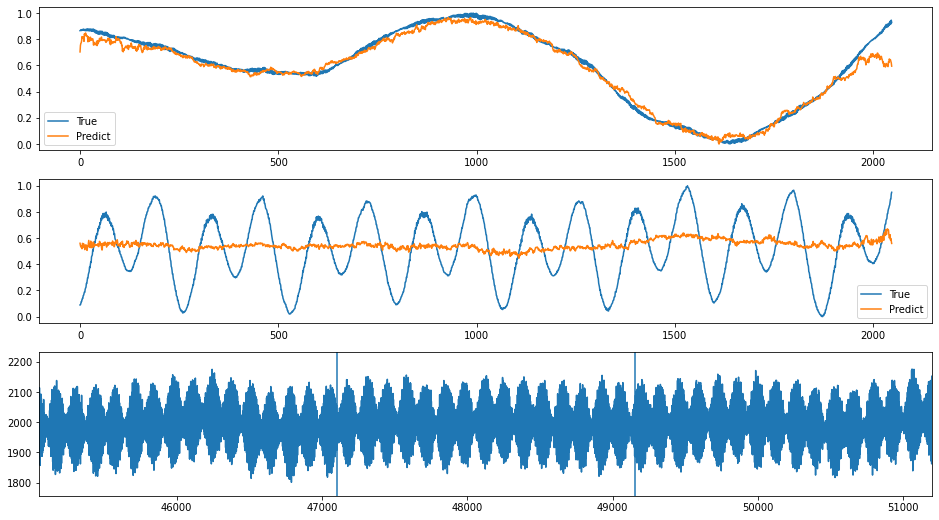

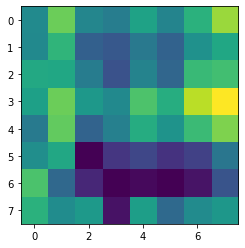

index: 242280
Error: 0.030957759911541614
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:46:49
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2538
bunch_number                                                  123
ts_length                                                   65536
chunk                                                          22
Name: 5834, dtype: object


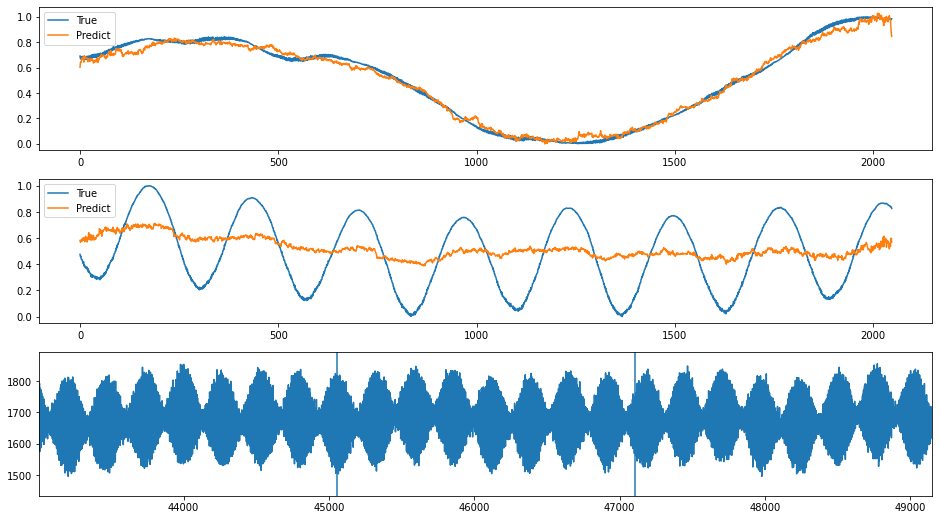

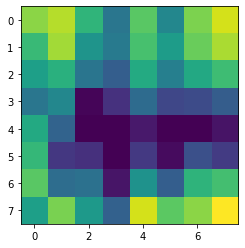

index: 39384
Error: 0.030935032588440402
type                                                         Inst
fill                                                         6988
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-27 05:43:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6988/...
n_bunches                                                     444
bunch_index                                                   599
bunch_number                                                  326
ts_length                                                   65536
chunk                                                          20
Name: 5174, dtype: object


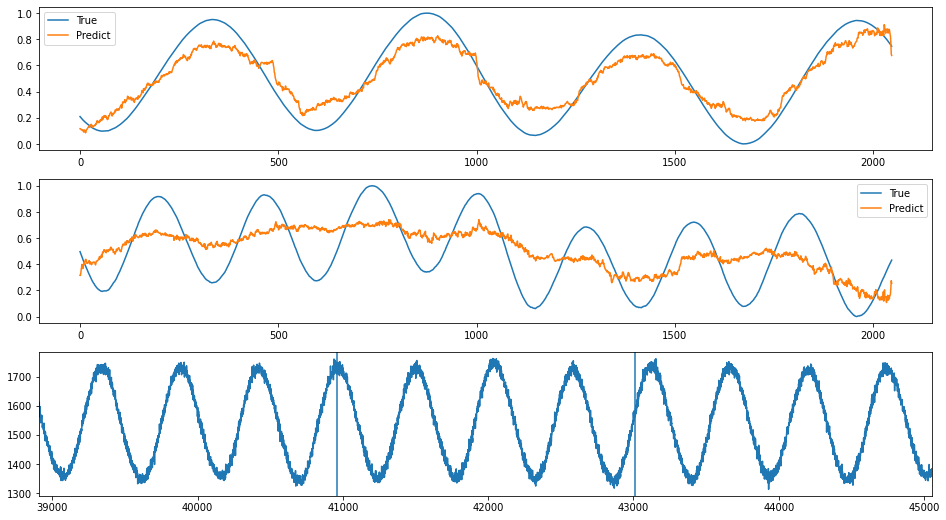

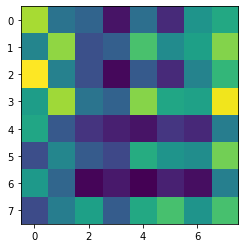

index: 33076
Error: 0.030413539078344362
type                                                         Inst
fill                                                         6988
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-27 05:43:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6988/...
n_bunches                                                     444
bunch_index                                                   599
bunch_number                                                  326
ts_length                                                   65536
chunk                                                          21
Name: 5430, dtype: object


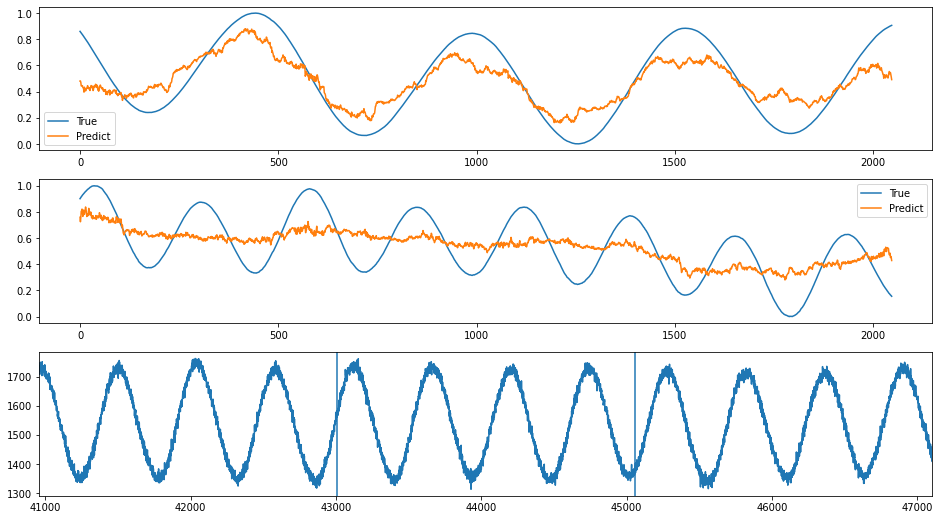

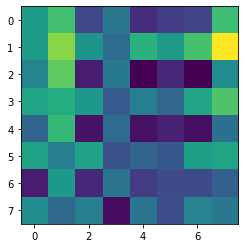

index: 228971
Error: 0.029687639766605094
type                                                         Inst
fill                                                         6748
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-01 01:06:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6748/...
n_bunches                                                     636
bunch_index                                                   831
bunch_number                                                  586
ts_length                                                   65536
chunk                                                          30
Name: 7868, dtype: object


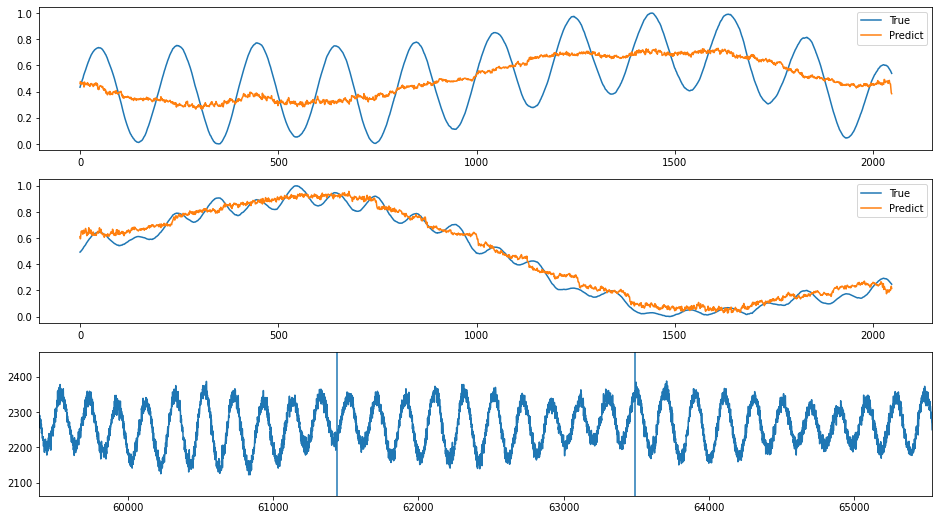

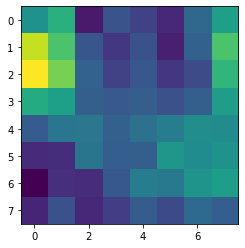

index: 243487
Error: 0.029513377216516888
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:54:56
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2531
bunch_number                                                  120
ts_length                                                   65536
chunk                                                           8
Name: 2153, dtype: object


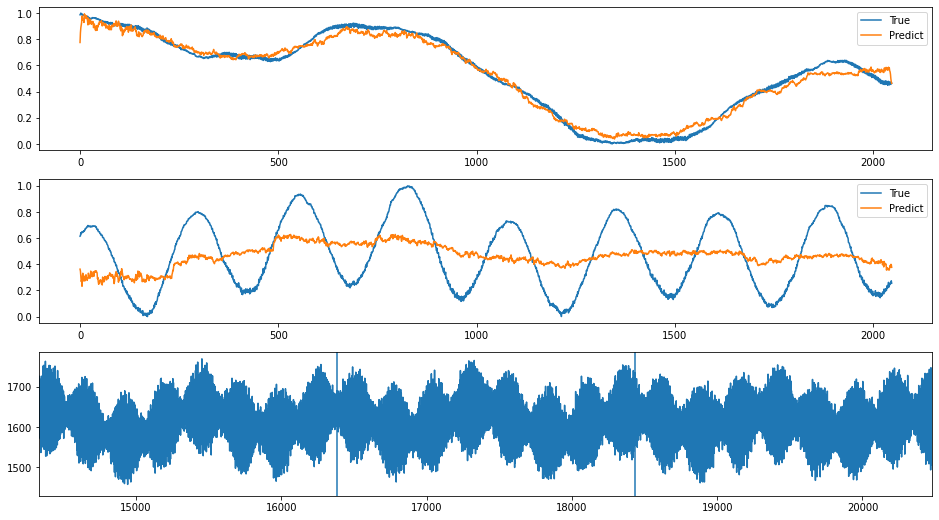

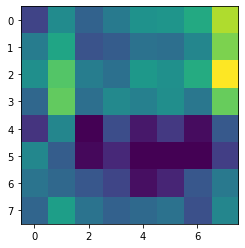

index: 103553
Error: 0.02950084197043043
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 23:00:38
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                    70
bunch_number                                                   11
ts_length                                                   65536
chunk                                                          18
Name: 4640, dtype: object


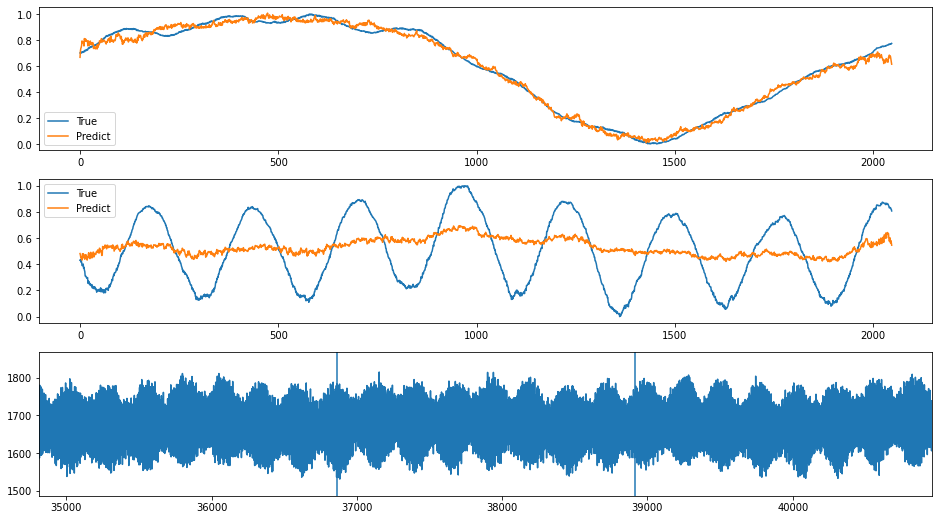

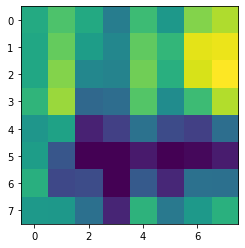

index: 244795
Error: 0.02939485293487739
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:46:49
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2538
bunch_number                                                  123
ts_length                                                   65536
chunk                                                          26
Name: 6858, dtype: object


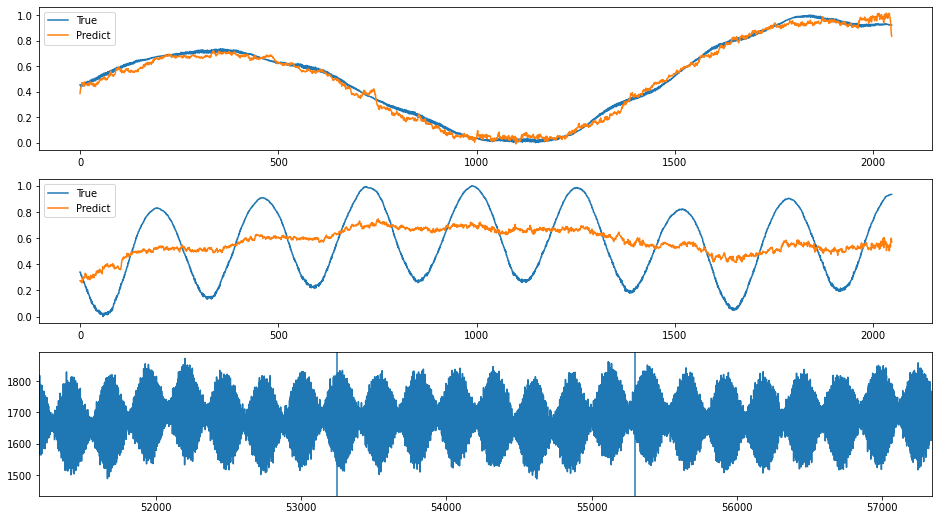

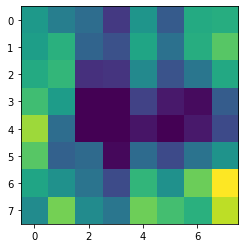

index: 107554
Error: 0.029392809013430547
type                                                         Inst
fill                                                         6797
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-15 00:45:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6797/...
n_bunches                                                     156
bunch_index                                                   377
bunch_number                                                  121
ts_length                                                   65536
chunk                                                           3
Name: 924, dtype: object


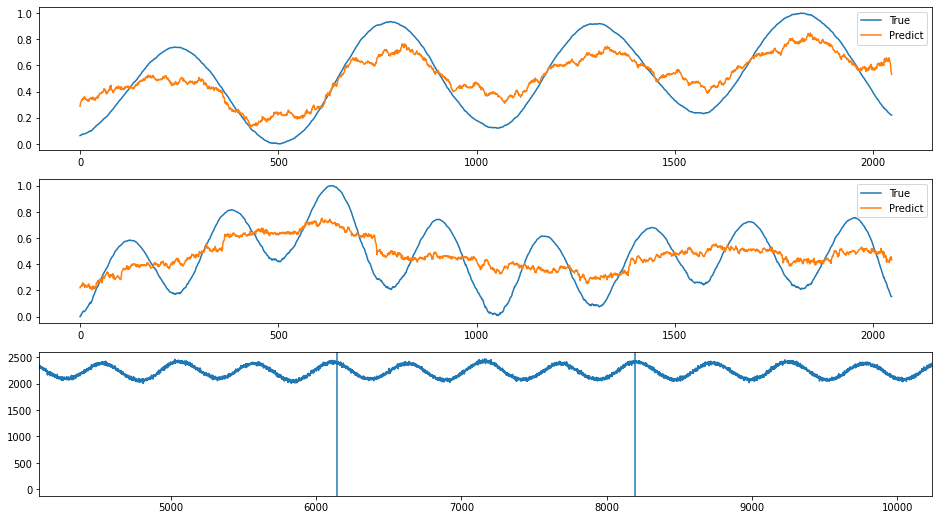

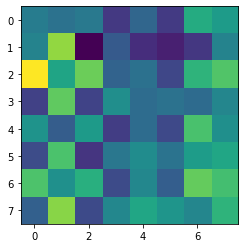

index: 245213
Error: 0.02909942596825186
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:46:49
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2538
bunch_number                                                  123
ts_length                                                   65536
chunk                                                          23
Name: 6090, dtype: object


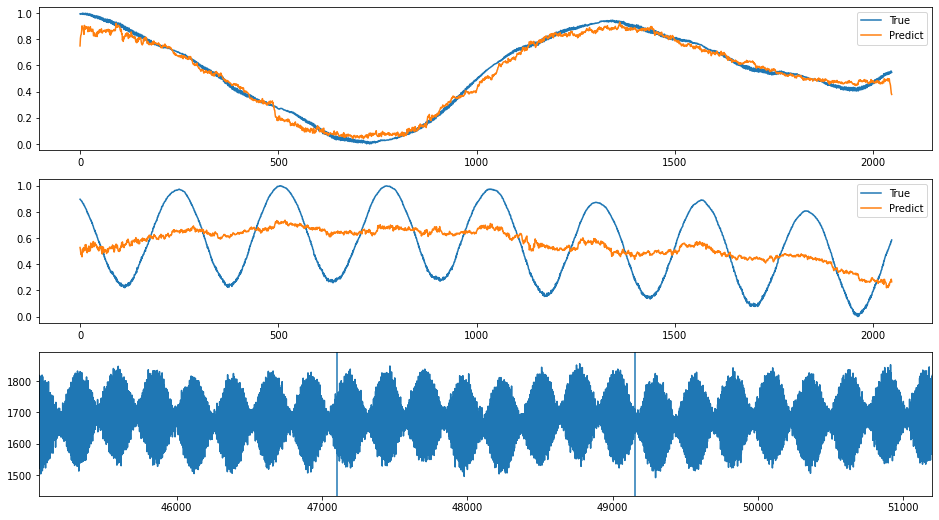

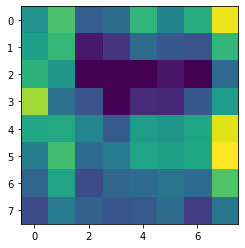

index: 38829
Error: 0.029066861538465764
type                                                         Inst
fill                                                         6988
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-27 05:43:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6988/...
n_bunches                                                     444
bunch_index                                                   599
bunch_number                                                  326
ts_length                                                   65536
chunk                                                          23
Name: 5942, dtype: object


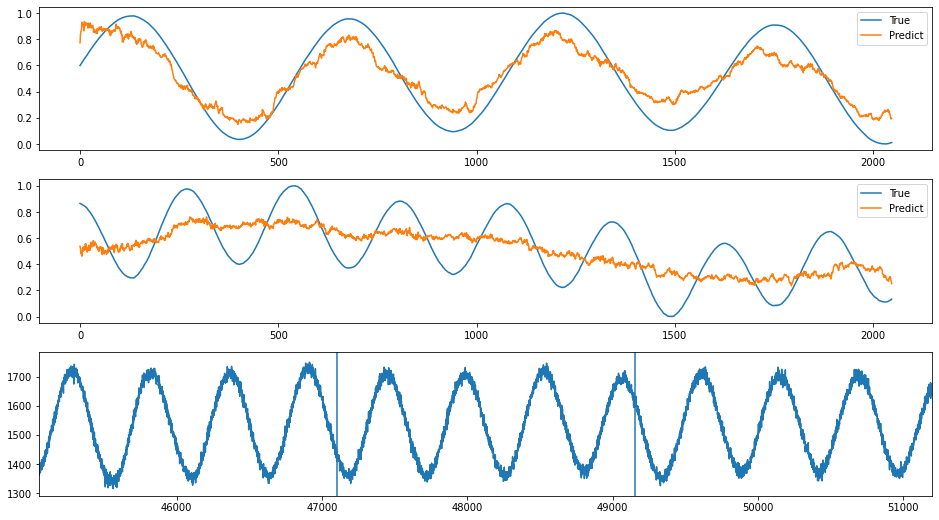

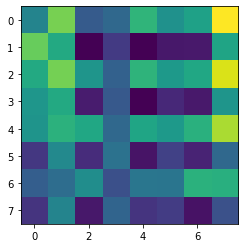

index: 31834
Error: 0.028322141074680635
type                                                         Inst
fill                                                         6988
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-27 05:43:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6988/...
n_bunches                                                     444
bunch_index                                                   599
bunch_number                                                  326
ts_length                                                   65536
chunk                                                          18
Name: 4662, dtype: object


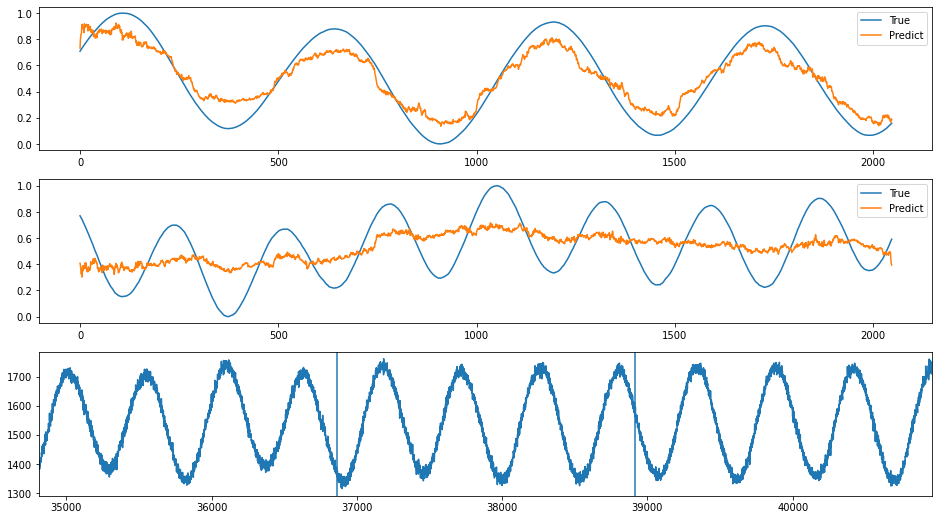

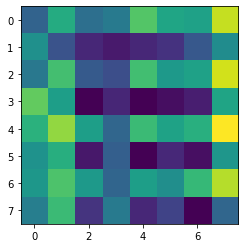

index: 104214
Error: 0.028112746857866824
type                                                         Inst
fill                                                         6266
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-02 19:29:50
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6266/...
n_bunches                                                    1836
bunch_index                                                   523
bunch_number                                                  273
ts_length                                                   65536
chunk                                                           7
Name: 2010, dtype: object


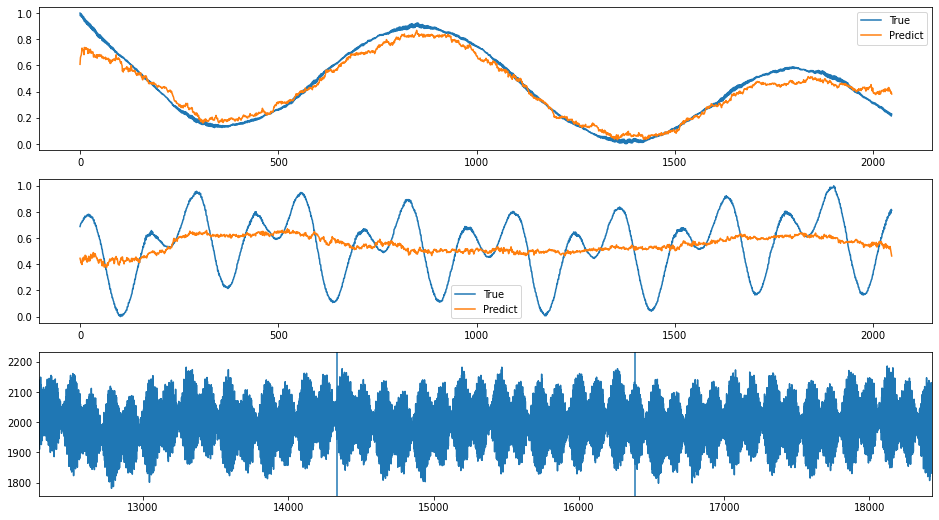

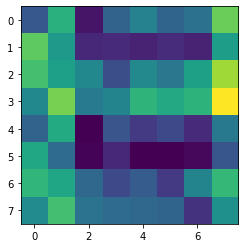

index: 238339
Error: 0.027963647895741652
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:54:56
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2531
bunch_number                                                  120
ts_length                                                   65536
chunk                                                          13
Name: 3433, dtype: object


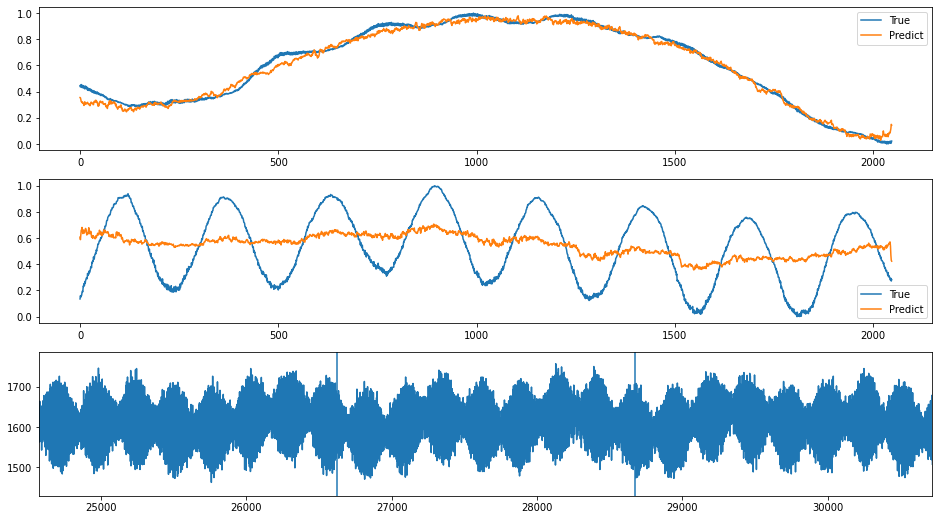

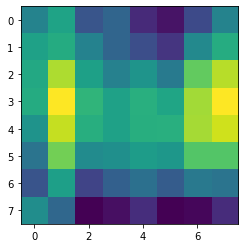

index: 108047
Error: 0.027828033385752834
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 23:00:38
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                    70
bunch_number                                                   11
ts_length                                                   65536
chunk                                                           5
Name: 1312, dtype: object


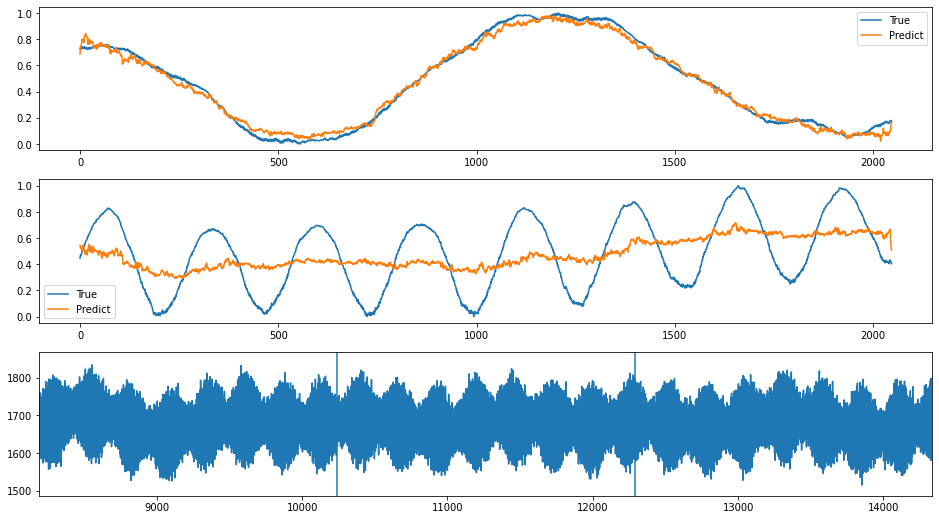

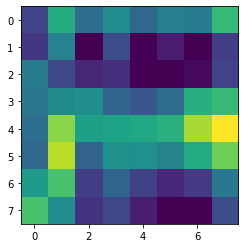

index: 39451
Error: 0.02766220876239245
type                                                         Inst
fill                                                         6988
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-27 05:43:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6988/...
n_bunches                                                     444
bunch_index                                                   599
bunch_number                                                  326
ts_length                                                   65536
chunk                                                          24
Name: 6198, dtype: object


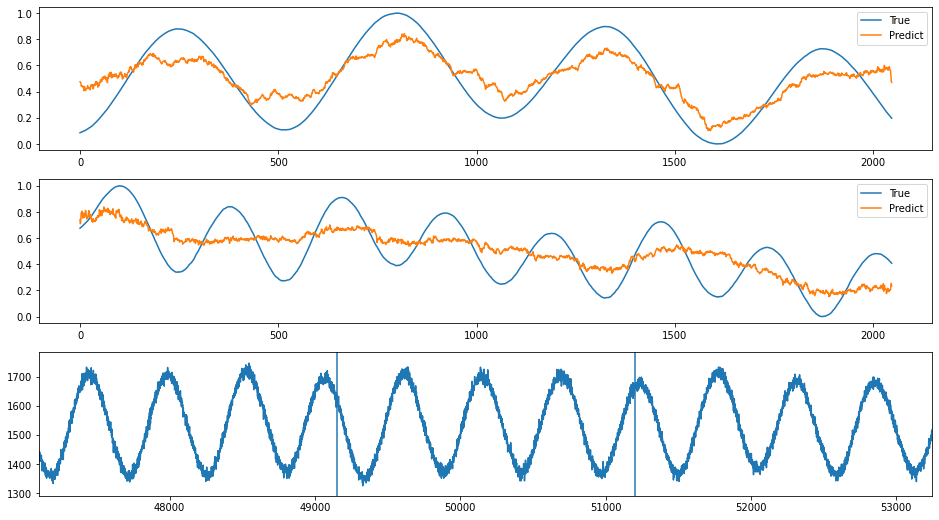

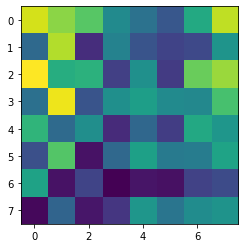

index: 243506
Error: 0.027541731549555065
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:46:49
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2538
bunch_number                                                  123
ts_length                                                   65536
chunk                                                           7
Name: 1994, dtype: object


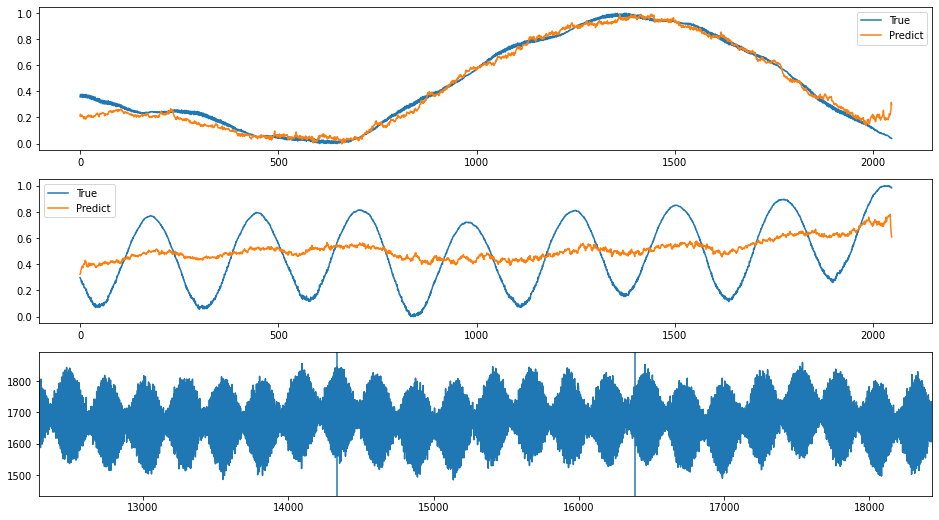

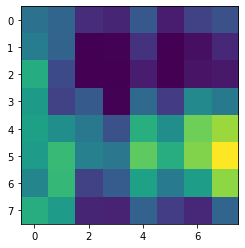

index: 382250
Error: 0.027298219032089177
type                                                         Inst
fill                                                         6452
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-03 03:02:39
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6452/...
n_bunches                                                     129
bunch_index                                                   535
bunch_number                                                   38
ts_length                                                   65536
chunk                                                          22
Name: 5828, dtype: object


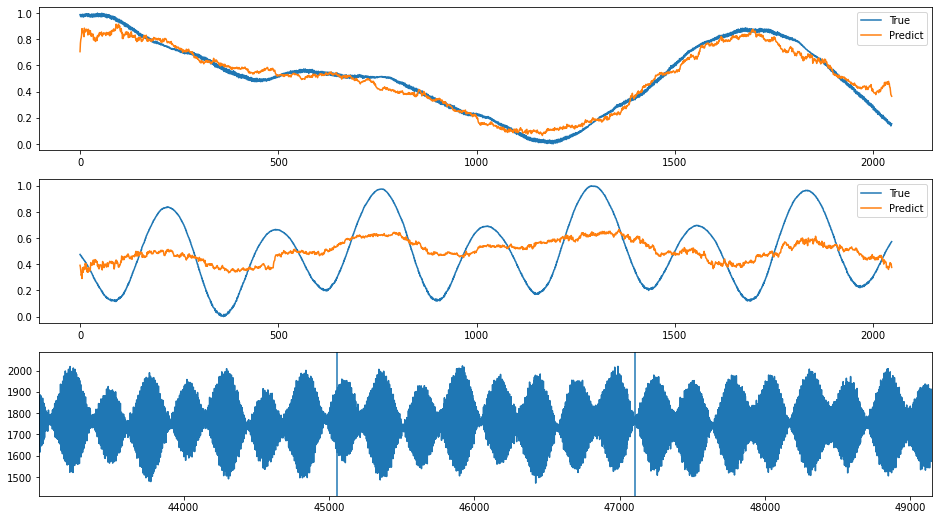

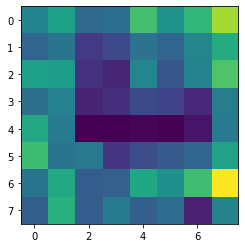

index: 242735
Error: 0.027220331873871944
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:54:56
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2531
bunch_number                                                  120
ts_length                                                   65536
chunk                                                           9
Name: 2409, dtype: object


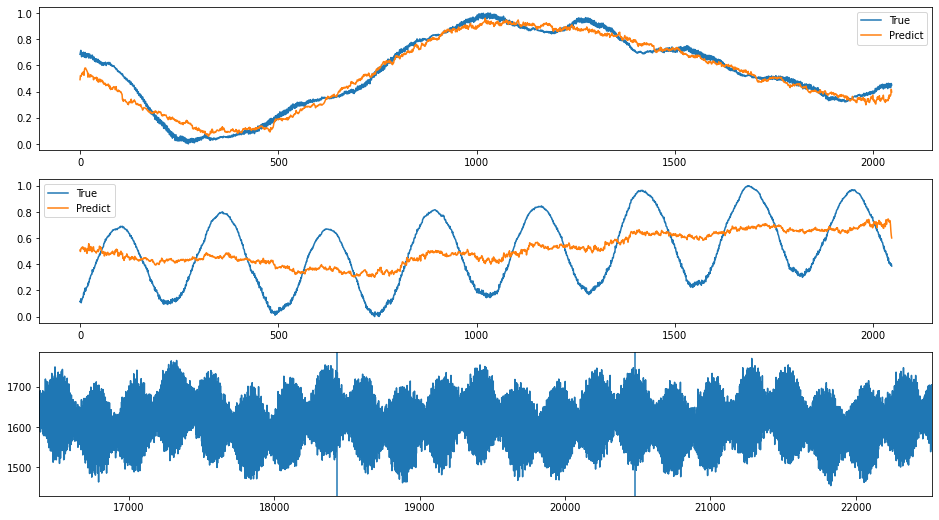

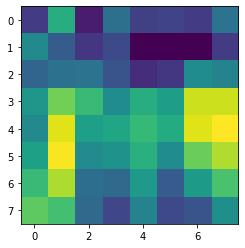

index: 240420
Error: 0.027188554651208834
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:46:49
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2538
bunch_number                                                  123
ts_length                                                   65536
chunk                                                           1
Name: 458, dtype: object


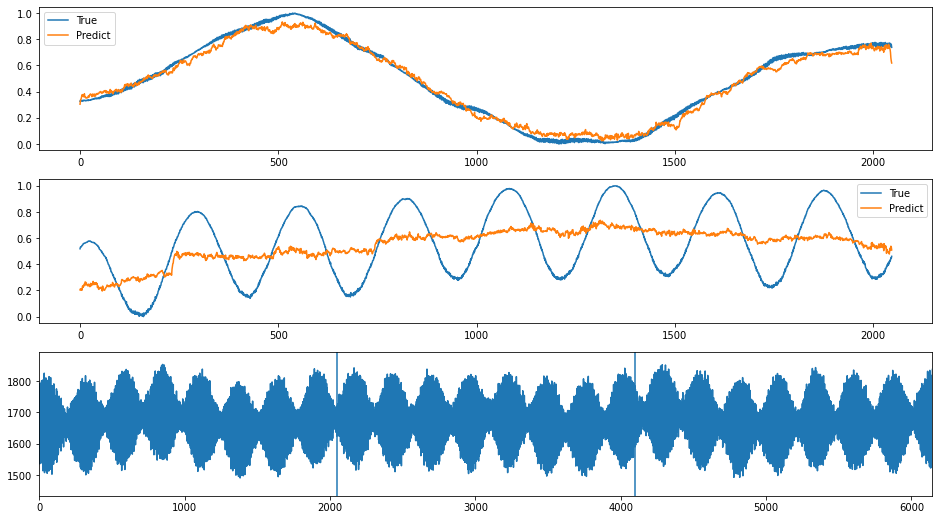

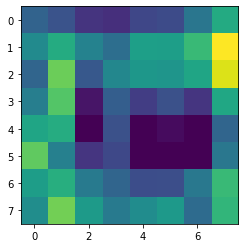

index: 386858
Error: 0.026889123321233017
type                                                         Inst
fill                                                         6452
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-03 03:02:39
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6452/...
n_bunches                                                     129
bunch_index                                                   535
bunch_number                                                   38
ts_length                                                   65536
chunk                                                          27
Name: 7108, dtype: object


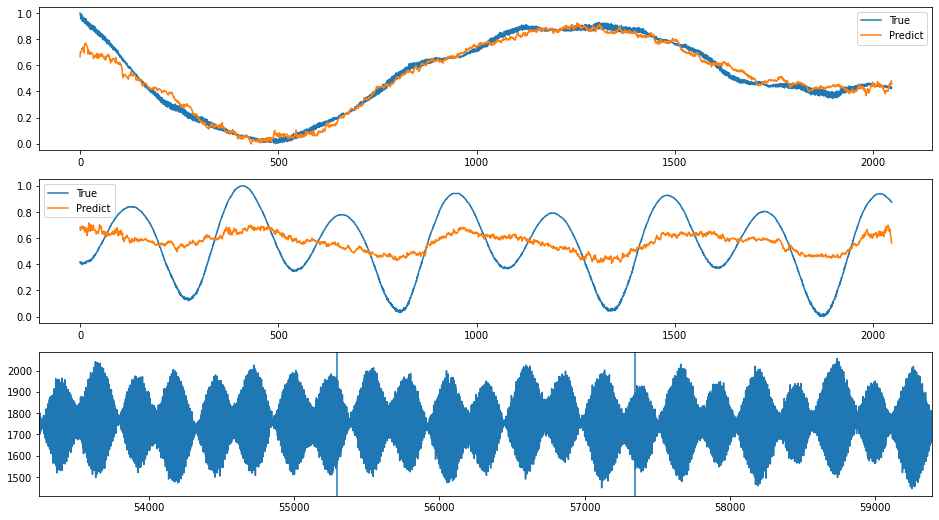

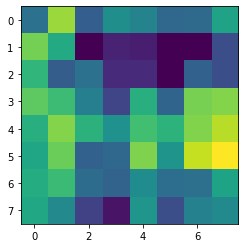

index: 242944
Error: 0.026485295593111868
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:54:56
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2531
bunch_number                                                  120
ts_length                                                   65536
chunk                                                          30
Name: 7785, dtype: object


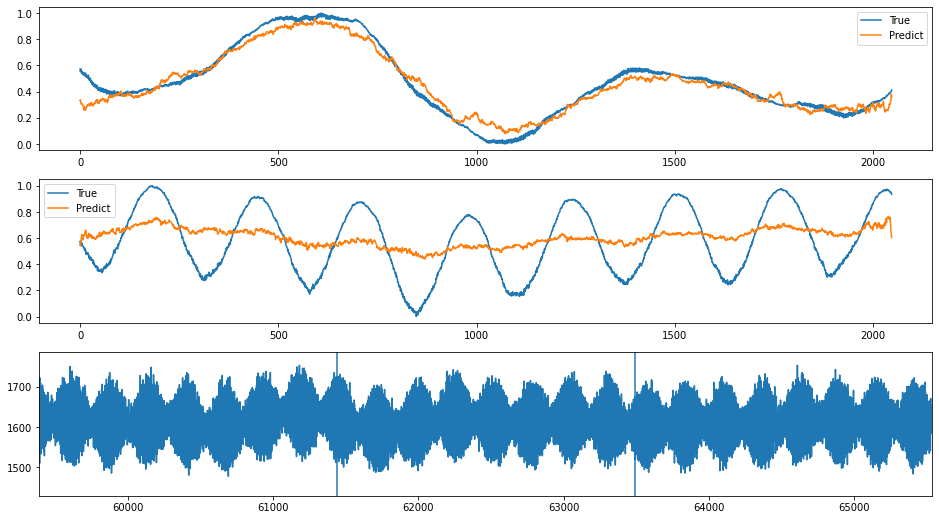

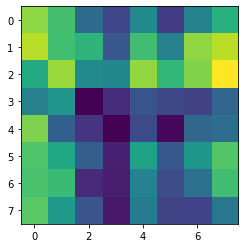

index: 241128
Error: 0.02639351643157075
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:54:56
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2531
bunch_number                                                  120
ts_length                                                   65536
chunk                                                          12
Name: 3177, dtype: object


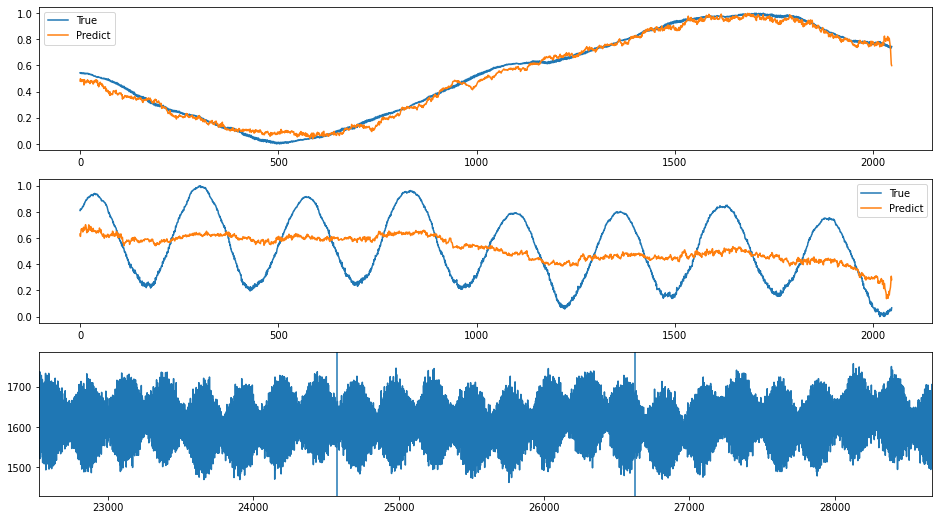

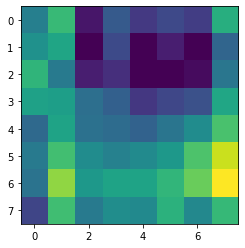

index: 244045
Error: 0.025822666180912238
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:54:56
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2531
bunch_number                                                  120
ts_length                                                   65536
chunk                                                          21
Name: 5481, dtype: object


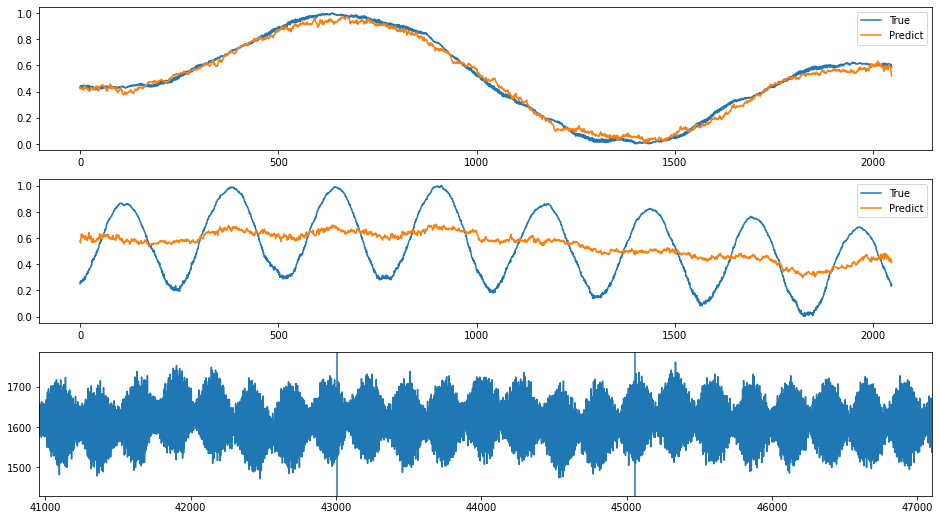

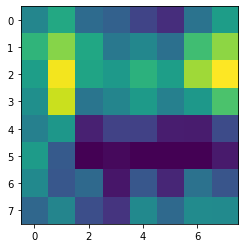

index: 191524
Error: 0.025781609570844542
type                                                         Inst
fill                                                         6797
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-14 23:10:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6797/...
n_bunches                                                     158
bunch_index                                                   232
bunch_number                                                   46
ts_length                                                   65536
chunk                                                          22
Name: 5816, dtype: object


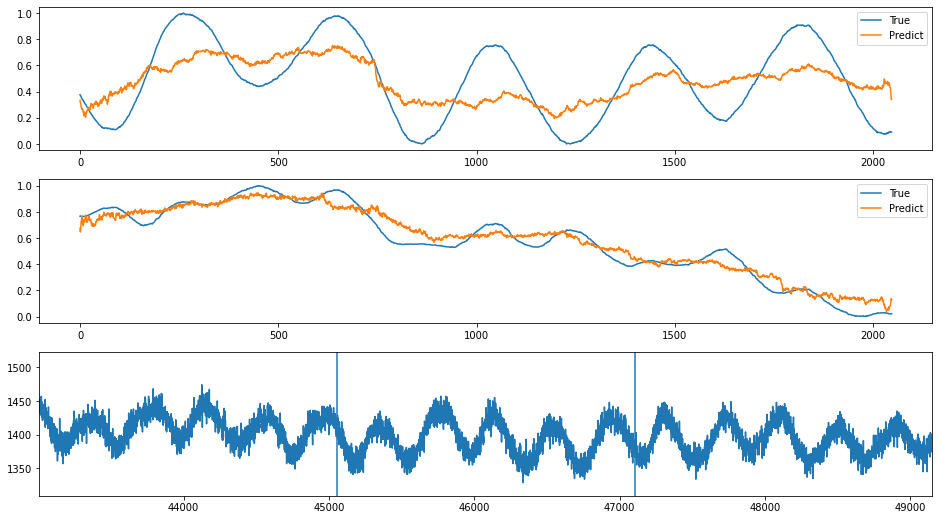

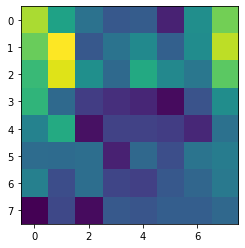

index: 239474
Error: 0.025780854150920282
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:46:49
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2538
bunch_number                                                  123
ts_length                                                   65536
chunk                                                          30
Name: 7882, dtype: object


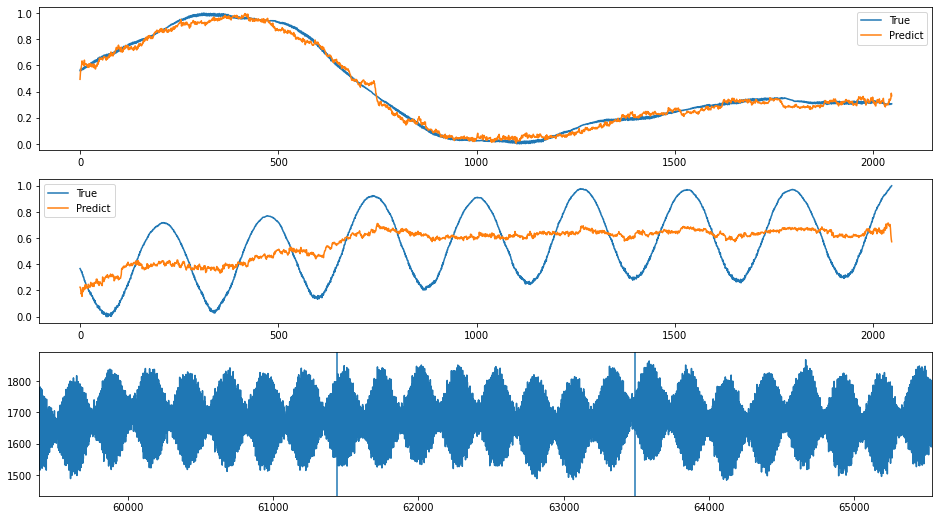

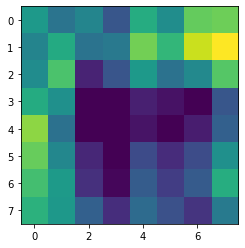

index: 107965
Error: 0.025671709637215424
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 23:00:38
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                    70
bunch_number                                                   11
ts_length                                                   65536
chunk                                                          10
Name: 2592, dtype: object


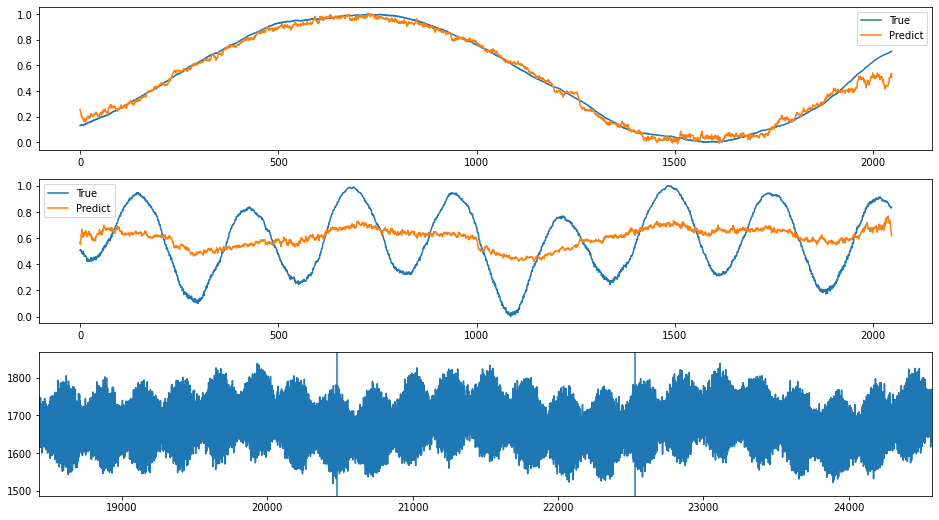

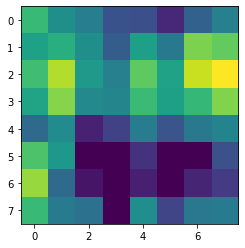

index: 105107
Error: 0.025561233973153984
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 23:00:38
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                    70
bunch_number                                                   11
ts_length                                                   65536
chunk                                                          22
Name: 5664, dtype: object


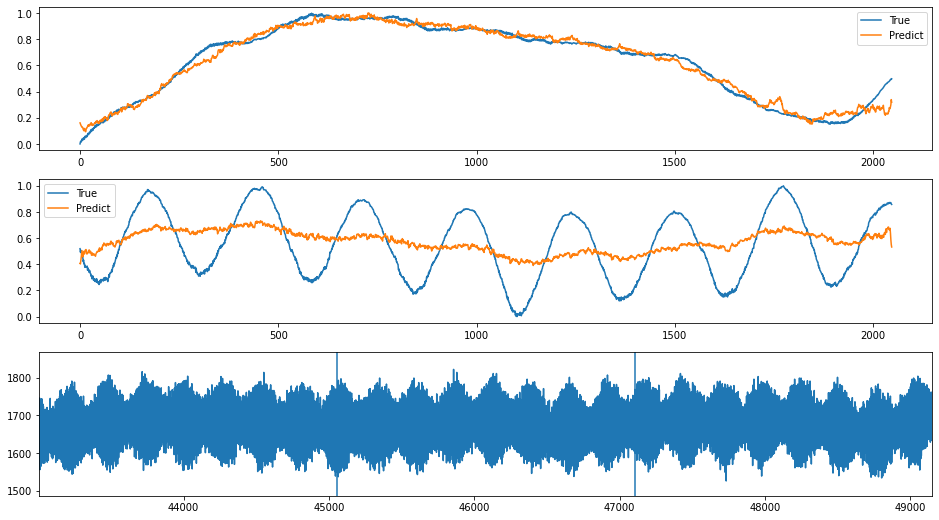

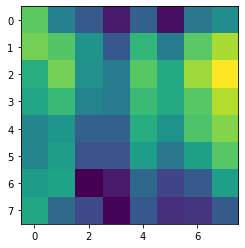

index: 167954
Error: 0.02547699985001812
type                                                         Inst
fill                                                         6988
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-27 05:19:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6988/...
n_bunches                                                     444
bunch_index                                                   502
bunch_number                                                  260
ts_length                                                   65536
chunk                                                          26
Name: 6669, dtype: object


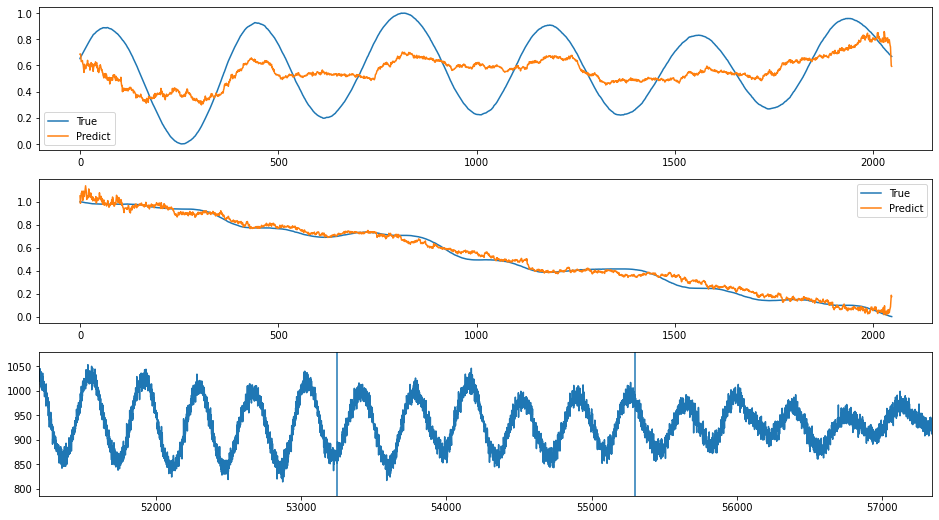

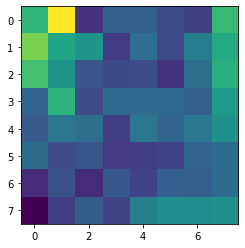

index: 352957
Error: 0.025450005874351103
type                                                         Inst
fill                                                         6255
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-29 22:57:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6255/...
n_bunches                                                    1916
bunch_index                                                   895
bunch_number                                                  478
ts_length                                                   65536
chunk                                                          21
Name: 5529, dtype: object


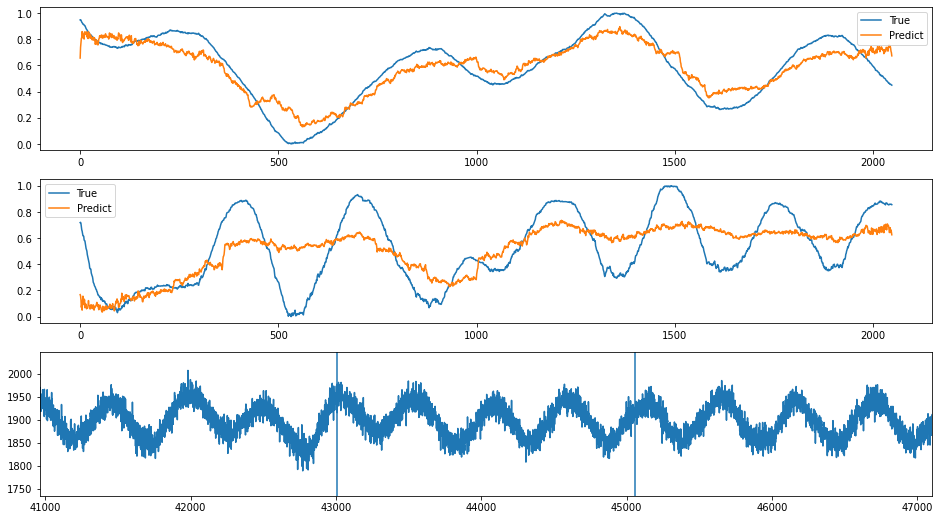

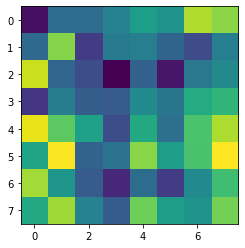

index: 104447
Error: 0.025334367152326807
type                                                         Inst
fill                                                         6797
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-15 00:45:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6797/...
n_bunches                                                     156
bunch_index                                                   377
bunch_number                                                  121
ts_length                                                   65536
chunk                                                           4
Name: 1180, dtype: object


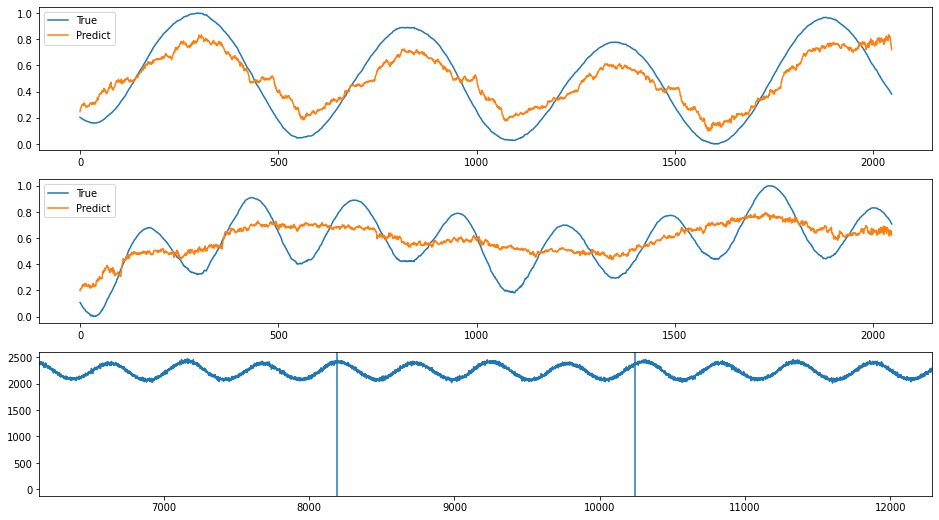

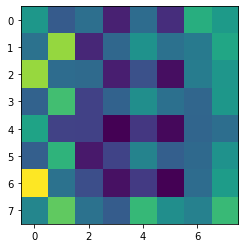

index: 90739
Error: 0.025318288306231215
type                                                         Inst
fill                                                         6988
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-27 05:42:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6988/...
n_bunches                                                     444
bunch_index                                                   582
bunch_number                                                  309
ts_length                                                   65536
chunk                                                          28
Name: 7182, dtype: object


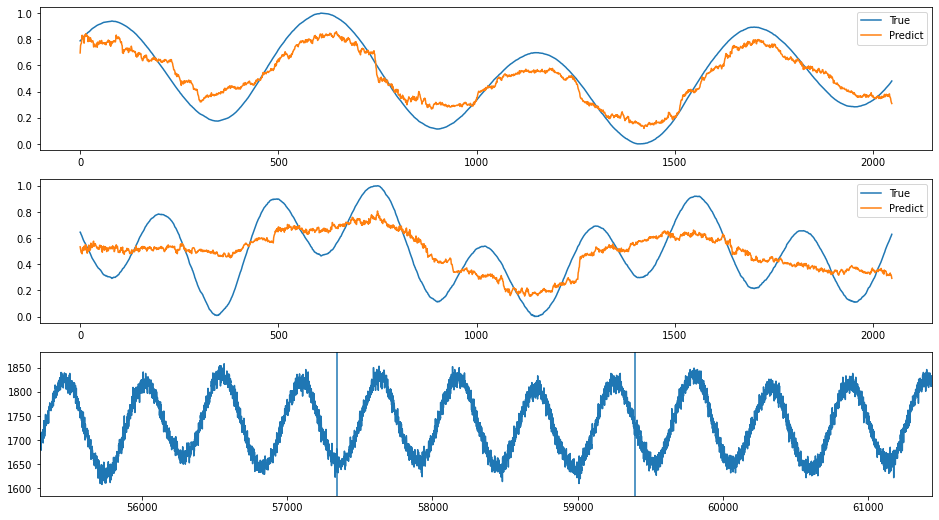

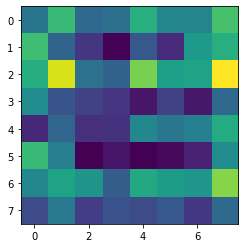

index: 33462
Error: 0.02530855157336566
type                                                         Inst
fill                                                         6988
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-27 05:43:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6988/...
n_bunches                                                     444
bunch_index                                                   599
bunch_number                                                  326
ts_length                                                   65536
chunk                                                          15
Name: 3894, dtype: object


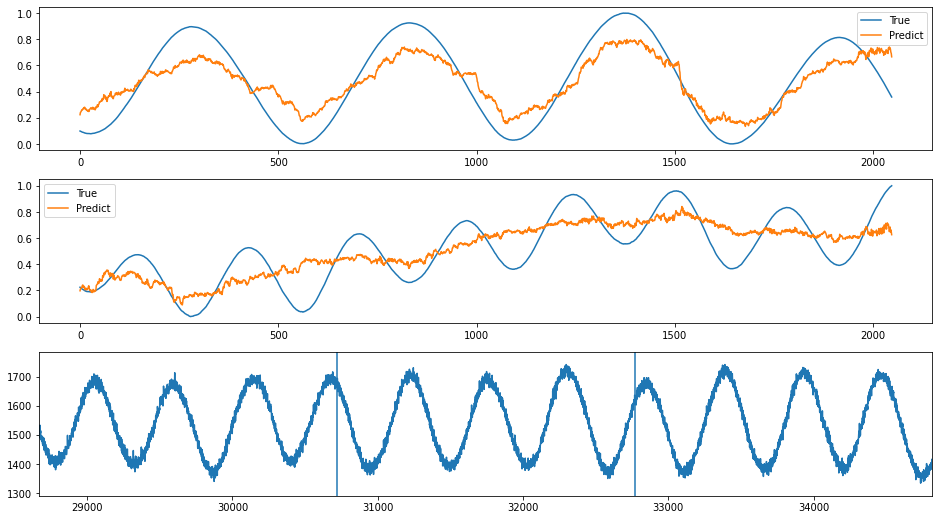

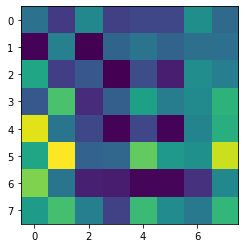

index: 206651
Error: 0.024982533747953936
type                                                         Inst
fill                                                         6713
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-23 06:20:16
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6713/...
n_bunches                                                     108
bunch_index                                                   107
bunch_number                                                   39
ts_length                                                   65536
chunk                                                          22
Name: 5751, dtype: object


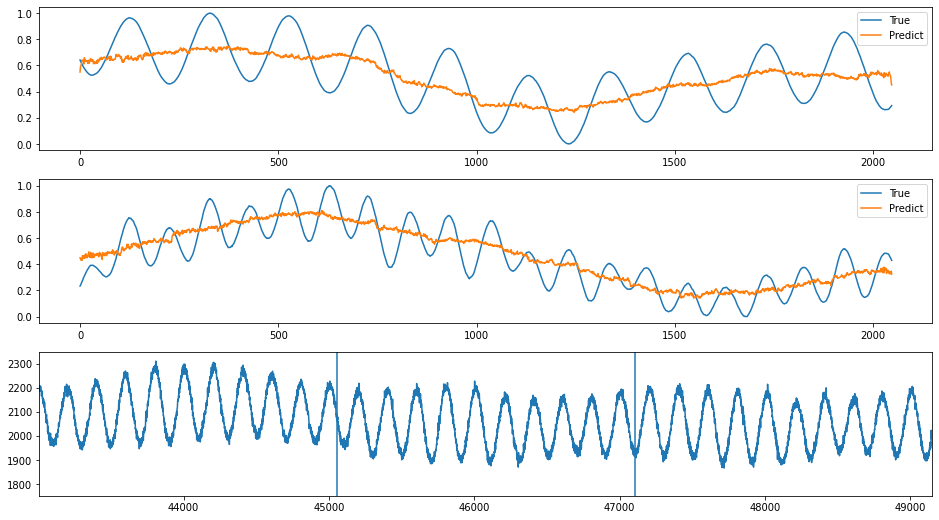

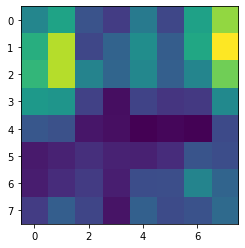

index: 169880
Error: 0.024916733416042204
type                                                         Inst
fill                                                         6988
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-27 05:19:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6988/...
n_bunches                                                     444
bunch_index                                                   502
bunch_number                                                  260
ts_length                                                   65536
chunk                                                          23
Name: 5901, dtype: object


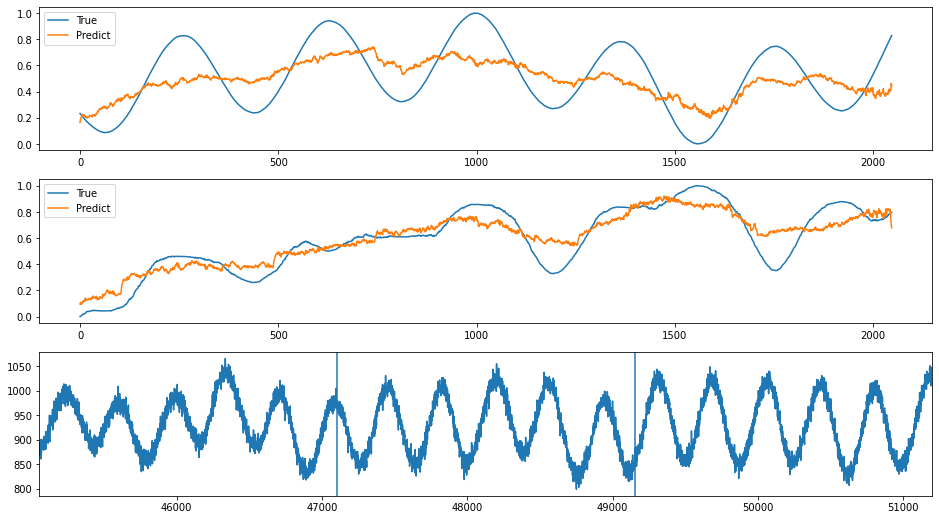

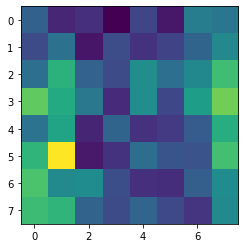

index: 105240
Error: 0.024908961161029
type                                                         Inst
fill                                                         6266
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-02 19:29:50
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6266/...
n_bunches                                                    1836
bunch_index                                                   523
bunch_number                                                  273
ts_length                                                   65536
chunk                                                          14
Name: 3802, dtype: object


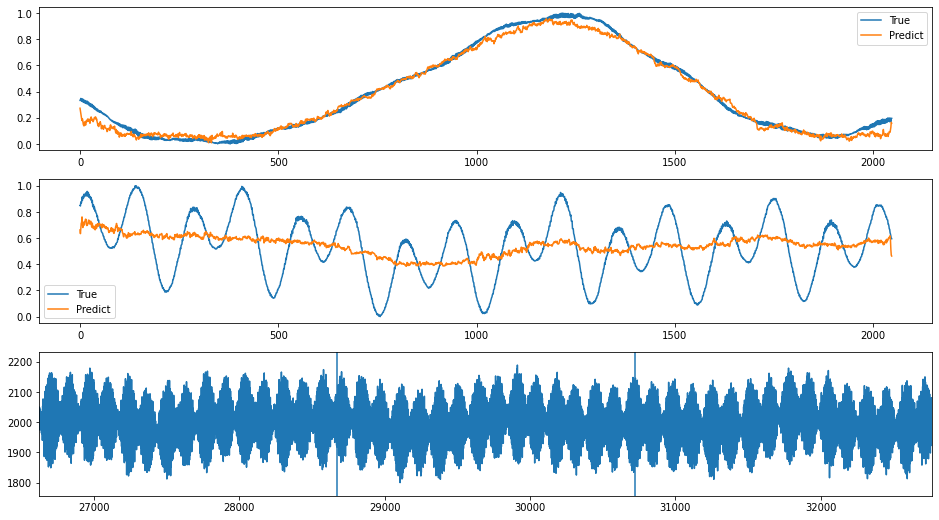

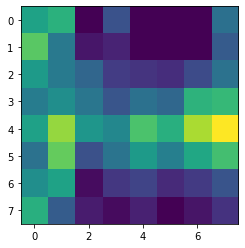

index: 388752
Error: 0.024833594139879032
type                                                         Inst
fill                                                         6452
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-03 03:02:39
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6452/...
n_bunches                                                     129
bunch_index                                                   535
bunch_number                                                   38
ts_length                                                   65536
chunk                                                          11
Name: 3012, dtype: object


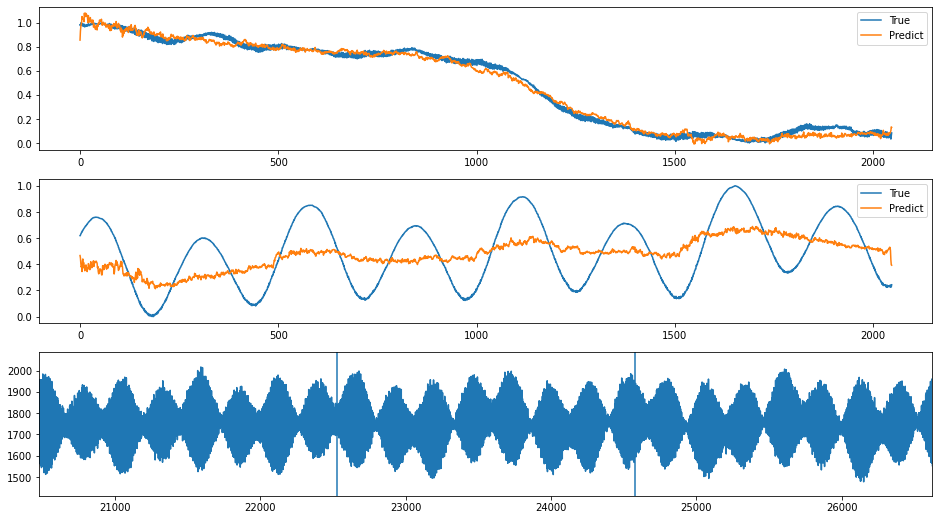

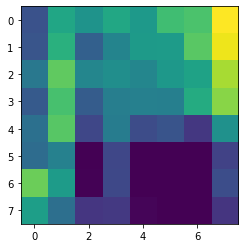

index: 110695
Error: 0.024691955795830403
type                                                         Inst
fill                                                         6266
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-02 19:29:50
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6266/...
n_bunches                                                    1836
bunch_index                                                   523
bunch_number                                                  273
ts_length                                                   65536
chunk                                                          13
Name: 3546, dtype: object


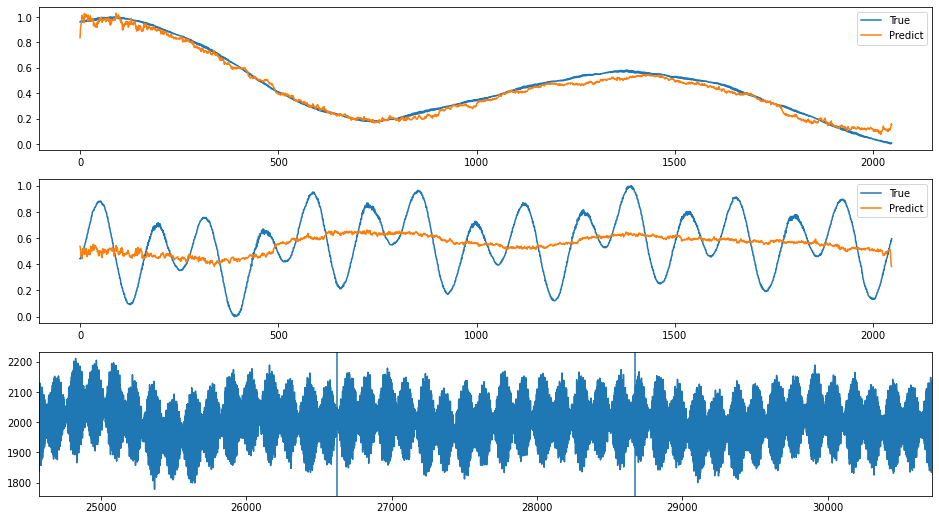

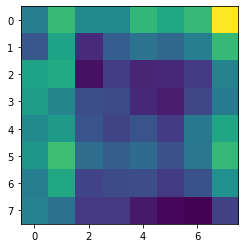

In [26]:
for i in range(1, 51):
    index = sorted_error_indices[-i]
    plot_train_index(index)

# Around the peak

In [27]:
error_around_peak = abs(train_error - hist_peak)
sorted_error_indices_around_peak = np.argsort(error_around_peak)

index: 214234
Error: 0.0015840721052945205
type                                                         Inst
fill                                                         7392
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-30 20:05:09
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7392/...
n_bunches                                                     300
bunch_index                                                  1368
bunch_number                                                  188
ts_length                                                   65536
chunk                                                          24
Name: 6274, dtype: object


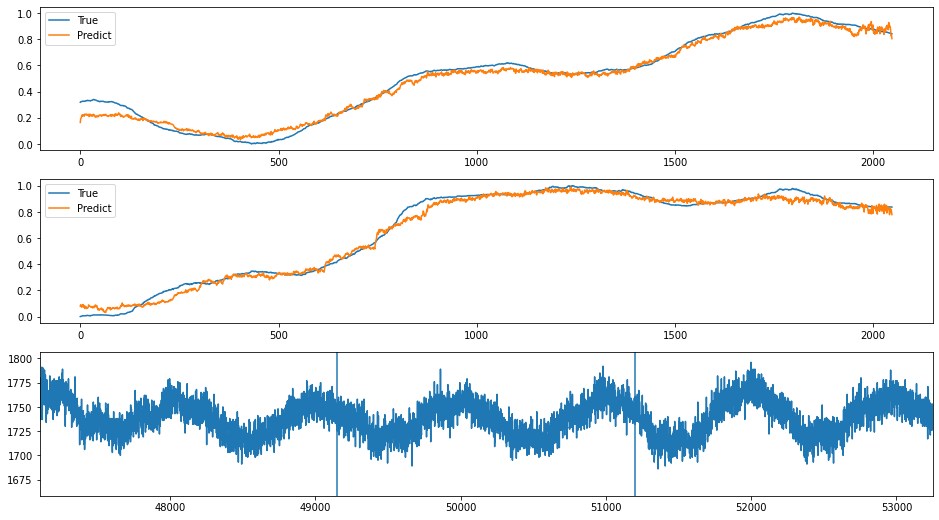

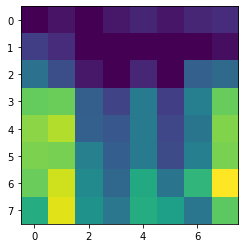

index: 262425
Error: 0.0015840748415552185
type                                                         Inst
fill                                                         6351
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-31 15:17:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6351/...
n_bunches                                                     780
bunch_index                                                   893
bunch_number                                                  473
ts_length                                                   65536
chunk                                                          22
Name: 5842, dtype: object


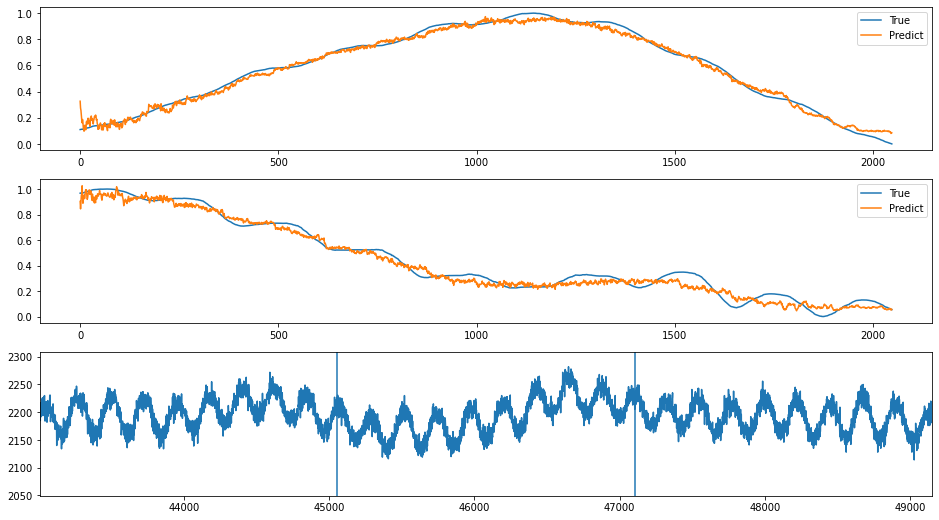

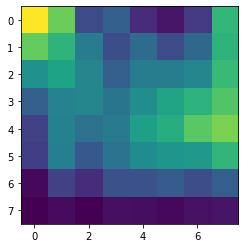

index: 180688
Error: 0.001584075783572534
type                                                         Inst
fill                                                         6689
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-16 01:13:10
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6689/...
n_bunches                                                     794
bunch_index                                                   214
bunch_number                                                   83
ts_length                                                   65536
chunk                                                          30
Name: 7803, dtype: object


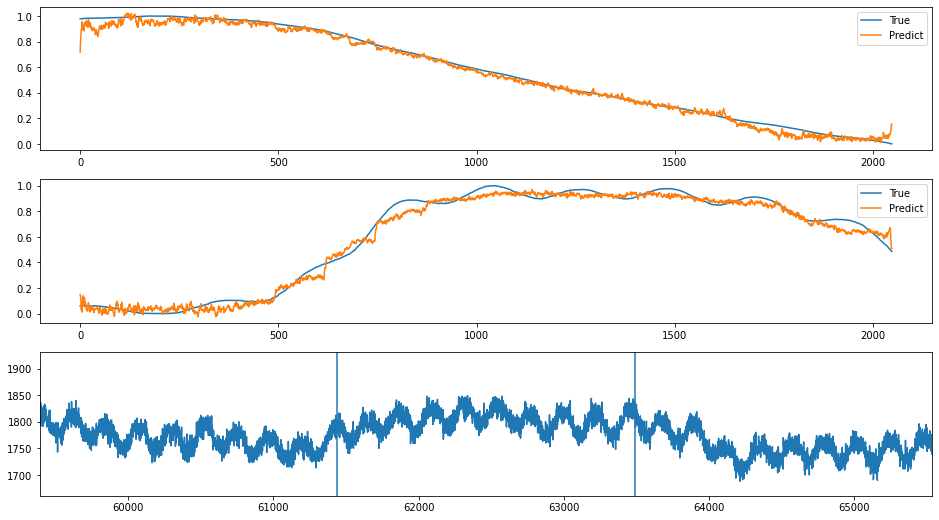

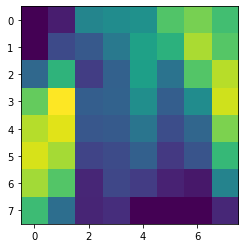

index: 365335
Error: 0.0015840529214043453
type                                                         Inst
fill                                                         6602
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-23 18:41:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6602/...
n_bunches                                                    1956
bunch_index                                                  1129
bunch_number                                                  908
ts_length                                                   65536
chunk                                                          15
Name: 3901, dtype: object


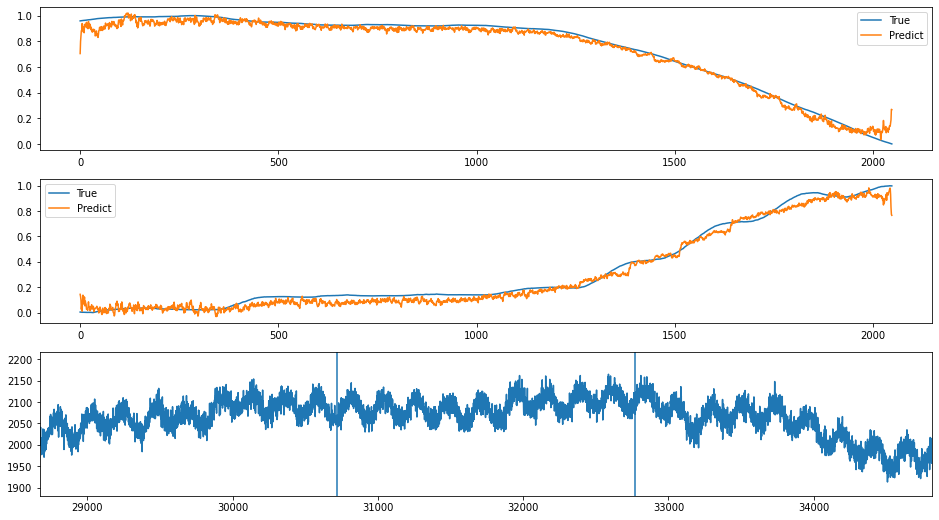

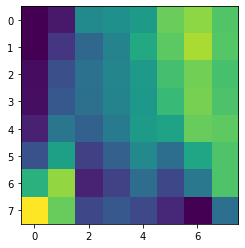

index: 20106
Error: 0.0015840510453093402
type                                                         Inst
fill                                                         6748
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-01 01:08:35
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6748/...
n_bunches                                                     924
bunch_index                                                   428
bunch_number                                                  277
ts_length                                                   65536
chunk                                                           7
Name: 1992, dtype: object


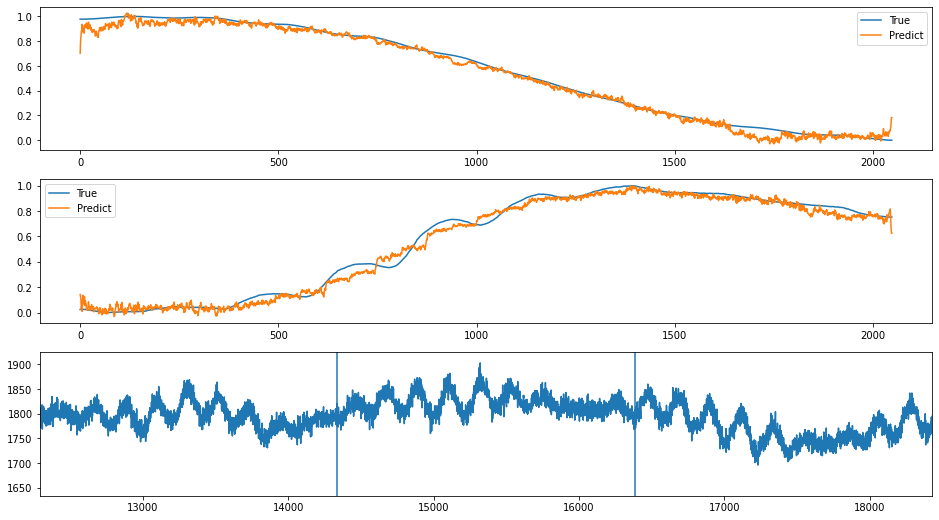

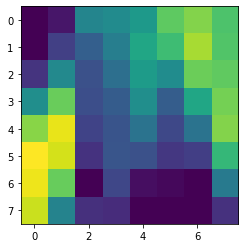

index: 196804
Error: 0.001584046282252069
type                                                         Inst
fill                                                         7308
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-16 11:22:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7308/...
n_bunches                                                     603
bunch_index                                                    96
bunch_number                                                   15
ts_length                                                   65536
chunk                                                          16
Name: 4108, dtype: object


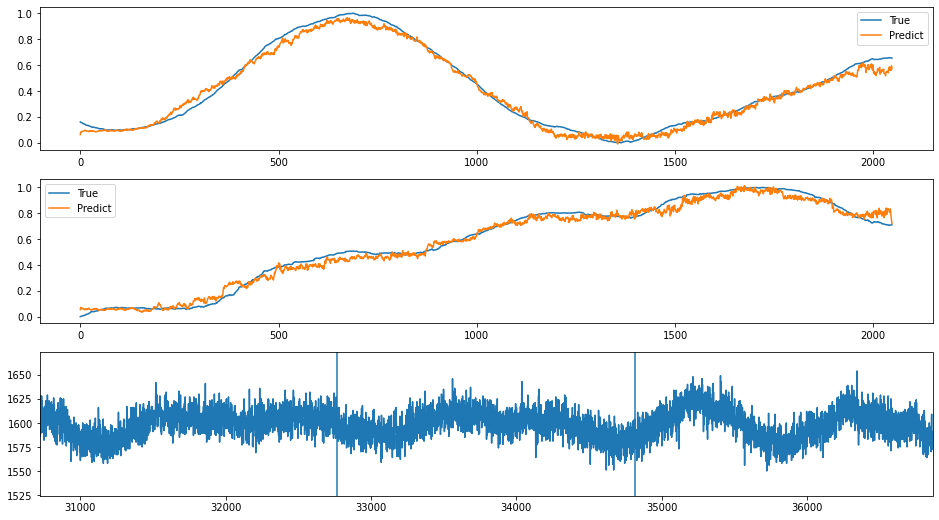

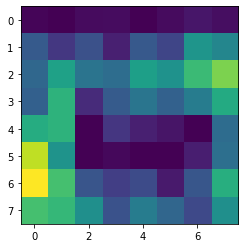

index: 274592
Error: 0.001584045260924335
type                                                         Inst
fill                                                         7481
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-28 09:49:54
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7481/...
n_bunches                                                     460
bunch_index                                                  1466
bunch_number                                                  312
ts_length                                                   65536
chunk                                                          11
Name: 2870, dtype: object


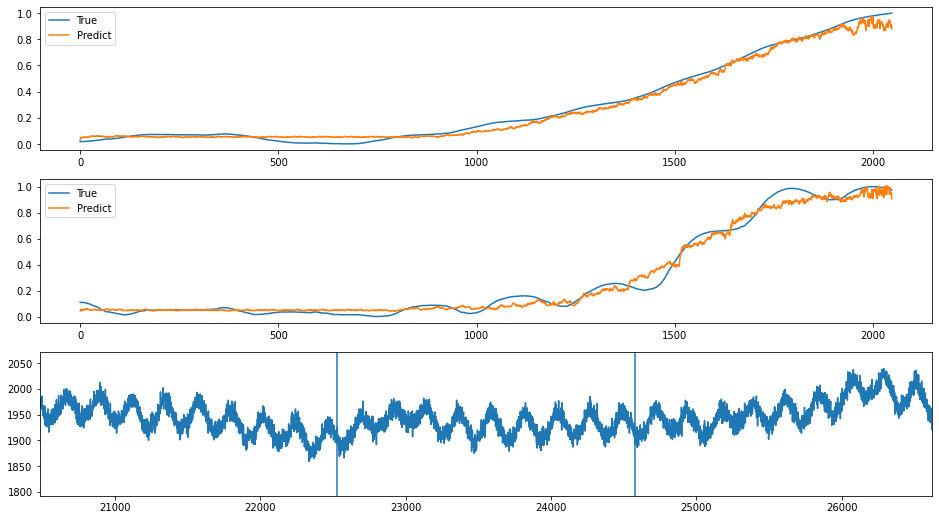

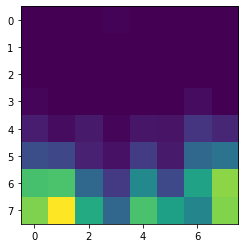

index: 298235
Error: 0.0015840420660311228
type                                                         Inst
fill                                                         7486
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-30 08:16:29
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7486/...
n_bunches                                                     376
bunch_index                                                  1522
bunch_number                                                  319
ts_length                                                   65536
chunk                                                          26
Name: 6680, dtype: object


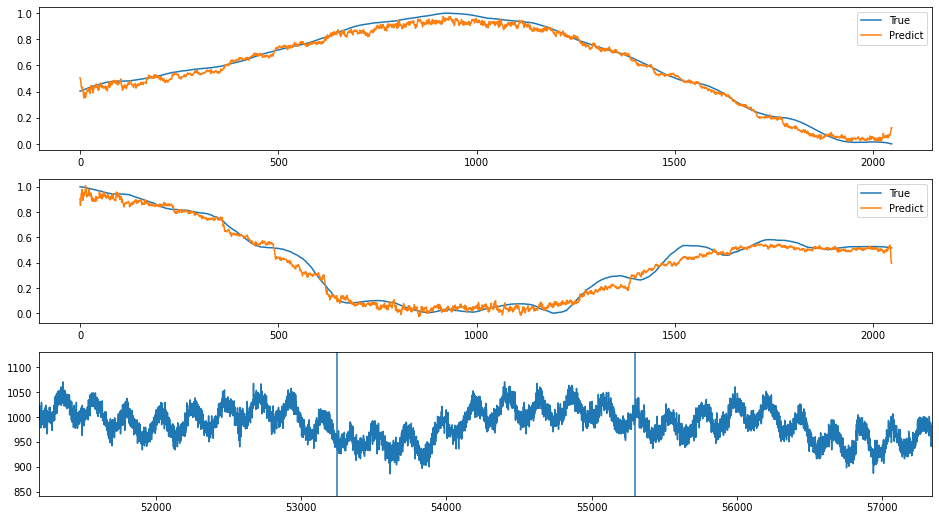

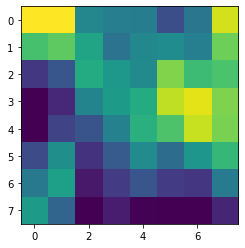

index: 70244
Error: 0.0015840933130424814
type                                                         Inst
fill                                                         6659
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-09 05:04:16
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6659/...
n_bunches                                                    2556
bunch_index                                                  1514
bunch_number                                                 1096
ts_length                                                   65536
chunk                                                          19
Name: 5047, dtype: object


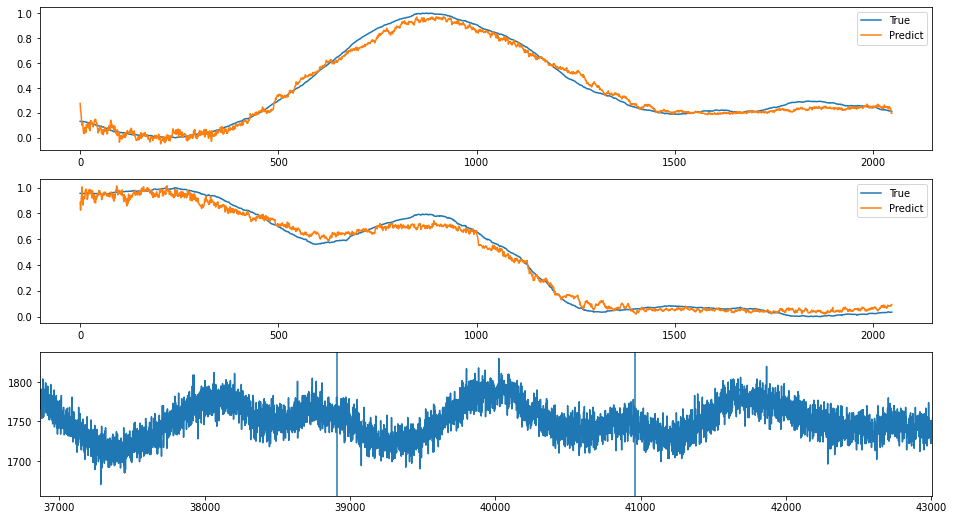

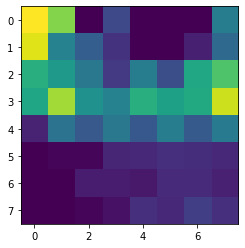

index: 13613
Error: 0.0015840343964601184
type                                                         Inst
fill                                                         6200
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-14 23:37:25
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6200/...
n_bunches                                                     156
bunch_index                                                  2270
bunch_number                                                   37
ts_length                                                   65536
chunk                                                          15
Name: 4023, dtype: object


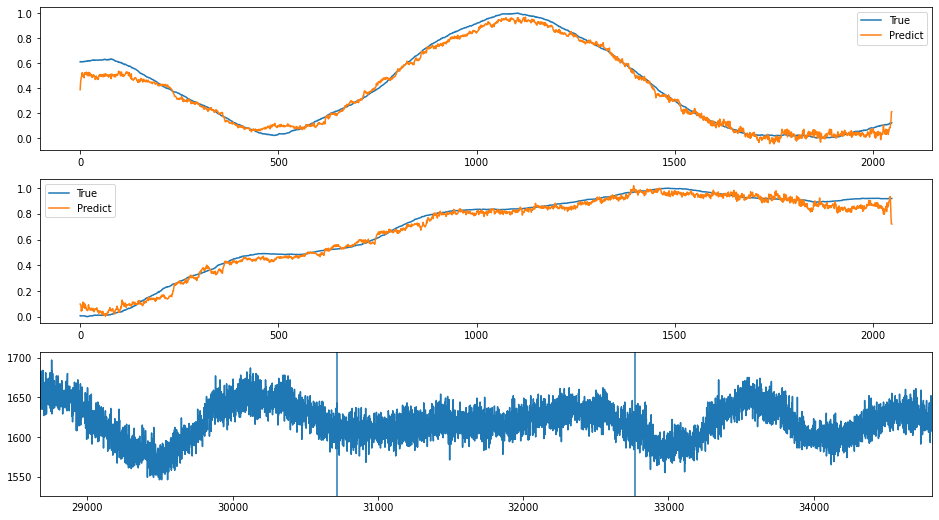

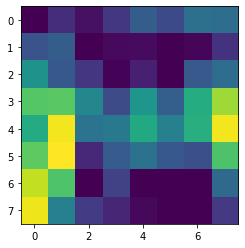

In [28]:
for i in range(10):
    index = sorted_error_indices_around_peak[i]
    plot_train_index(index)

# Around a point

In [29]:
# point = 

In [30]:
# error_around_peak = abs(train_error - point)
# sorted_error_indices_around_point = np.argsort(error_around_peak)

In [31]:
# for i in range(10):
#     index = sorted_error_indices_around_point[i]
#     plot_train_index(index)

# Clustering

In [32]:
indices = sorted_error_indices[-np.arange(1, 1024+1)]
encoding_true = train_data[indices]
encoding_pred = train_prediction[indices]
encoding_meta = train_meta.iloc[indices]
encoded = checker.encode(encoding_true)
encoded_2d = encoded.reshape(encoded.shape[0], -1)

In [33]:
encoded_2d.shape

(1024, 64)

In [34]:
def plot_clusters(cluster_indices):
    print(f"N samples: {len(cluster_indices)}")
    fig, axes = plt.subplots(2,1, figsize=(12, 3))
    axes[0].plot(encoding_true[cluster_indices][:,:, 0].T, linewidth=0, marker=',', alpha=0.1)
    axes[1].plot(encoding_true[cluster_indices][:,:, 1].T, linewidth=0, marker=',', alpha=0.1)
    return fig, axes

In [35]:
import sklearn
from sklearn.manifold import TSNE

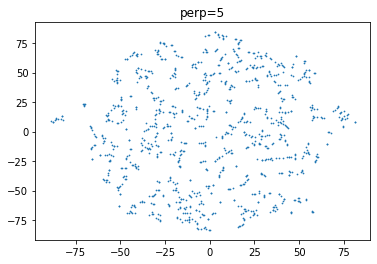

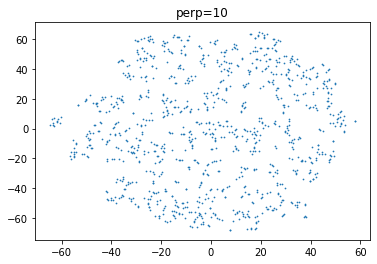

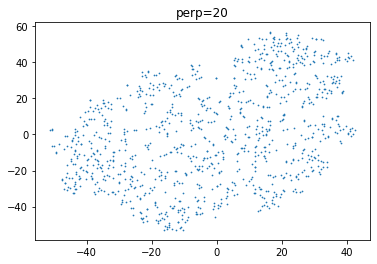

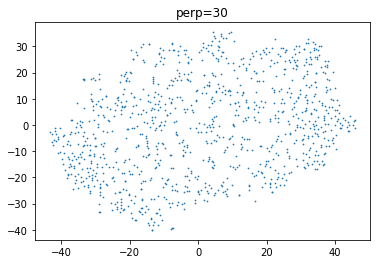

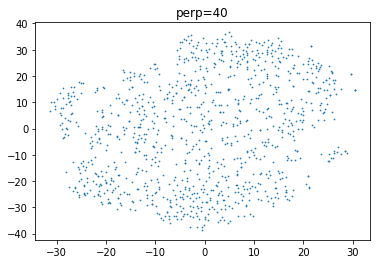

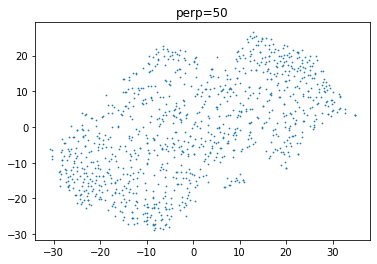

In [36]:
for perplexity in [5, 10, 20, 30, 40, 50]: 
    tsne = TSNE(perplexity=perplexity)
    encoded_2d_tsne = tsne.fit_transform(encoded_2d)
    plt.scatter(encoded_2d_tsne[:, 0], encoded_2d_tsne[:, 1], marker='.', s=2)
    plt.title(f"perp={perplexity}")
    plt.show()

In [37]:
tsne = TSNE(perplexity=30)
encoded_2d_tsne = tsne.fit_transform(encoded_2d)

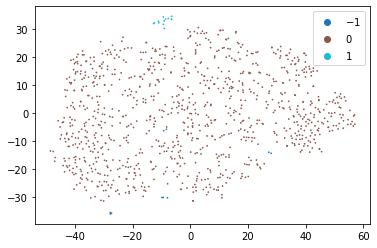

cluster -1
N samples: 9


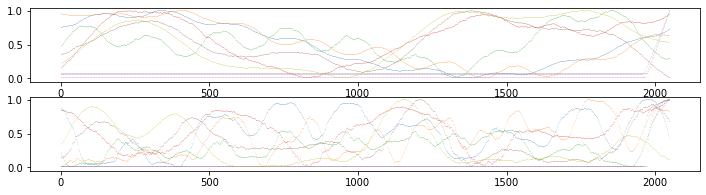

cluster 0
N samples: 1002


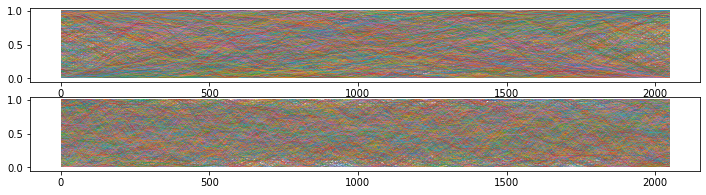

cluster 1
N samples: 13


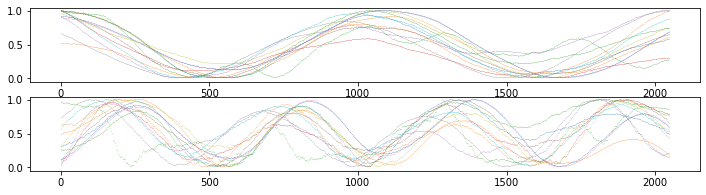

In [38]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=4)
clustering = dbscan.fit(encoded_2d_tsne)
sc = plt.scatter(encoded_2d_tsne[:, 0], encoded_2d_tsne[:, 1], marker='.', s=2, c=clustering.labels_, cmap='tab10')
plt.legend(*sc.legend_elements())
plt.show()
for cluster in np.unique(clustering.labels_):
    cluster_indices = np.where(clustering.labels_ == cluster)[0]
    print("cluster", cluster)
    fig, axes = plot_clusters(cluster_indices)
    plt.show()